# <center>" AML 2203 - Advanced Python AI and ML Tools "</center>

# Assignment #1 


### Group Members

- Aishlee C0913045
- Jayachandhran Saravanan C0910392
- Prashanta Timsina C0916254
- Rohan Aryan C0912902
- Yogita Sharma C0913011

Dataset and Onedrive links
The following are the one-drive links of,

- Dataset - https://mylambton-my.sharepoint.com/:x:/g/personal/c0910392_mylambton_ca/EcNOR8FqKpZIjLSAd6RMMgwBkL0XdUsWS2YNzf57-Jfc8g?e=Eq7kIx
- Whole working folder -https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/ElTNVm15LMlLhwqns823Pn4BecucWfYN-5o-MjCpkLv6Zw?e=KDfTG0
- Git hub - https://github.com/svjai/AML_2203_project

pandas_profiling- https://mylambton-my.sharepoint.com/:f:/g/personal/c0910392_mylambton_ca/EkkJIqcSk9xAl8bWBSNWcngBioMC9-S8-n7jSKfmS6yIcg?e=nV9AfI

# Step 1: Dataset Description 

For this assignment, we have scraped "computer" based books data.

- We have used __API Endpoint__ to acquire the data from this website https://www.ebooks.com/en-ca/
- It basically provides API to access the data without breaking the tags (as we were facing this issue while scraping data using Beautiful Soup).
- We used __requests.get()__ function to send a GET request to the specified URL with the custom headers and parameters.
- In other words, using API Endpoint, we created a __get request__ to this params with headers and URL of https://www.ebooks.com/en-ca/subjects/computers/
- Further, we got JSON response and the data is processed and stored in a dataframe first.
- Later, it is converted to a __csv file__ which we're gonna use now.

In total, we have a dataset with __39,990 rows and 15 features__, consisting of all predictive variables.

Each row in the dataset represents one unique book details corresponding to various attributes such as book ID, author, title, publisher, edition, etc. The features provided for each record are:

- __Title:__ the title of a book
- __id:__ an unique id for each book in the dataset
- __price:__ the price of the particular book
- __author:__ the author of the particular book
- __publisher:__ the publisher of the book
- __pub_year:__ the year in which the book was published
- __s_title:__ the subtitle of the book
- __edition_num:__ the edition number of the book
- __description:__ a detailed description of the book
- __available:__ indicates the availability status, whether a book is in stock or not.
- __sale_date:__ the date of sale for the book
- __short_pub:__ sale date for the book in short (Jan 24) 
- __num_of_author:__ the number of authors associated with the book
- __width:__ width dimension of the book (in cm)
- __height:__ height dimension of the book (in cm)

# Step 2: Data Wrangling

Let's proceed to the second step and apply the data wrangling steps. In this, we will __read__ our __dataset__ from the provided file in CSV format.

In this case, our __data source__ is request API and will __gather data__ from this single source.

In [1]:
# Importing necessary libraries.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.decomposition import PCA
import scipy.stats as stats


In [2]:
# importing the necessary libraries for the analysis

import pandas as pd                          # for data maniulation 
import numpy as np                           # for numerical operations
import matplotlib.pyplot as plt              # for visualization 
import seaborn as sns                        # for statistical visualization
import re                                    # for string manipulation
from PIL import Image                        # for image processing
from wordcloud import WordCloud, STOPWORDS   # for generating word clouds
from nltk.corpus import stopwords            # for dealing with stopwords
from nltk.tokenize import word_tokenize      # for tokenization
import ydata_profiling as pp    # for generating pandas profiling
import warnings                              # to ignore warnings
warnings.filterwarnings('ignore')            # ignore warnings during execution

In [3]:
import re
from kneed import KneeLocator #need to be installed before running
from PIL import Image
from IPython.display import clear_output
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import chain

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer #pip install this please

In [5]:
# loading the dataset
df = pd.read_csv('api_metod_40k_15_fields.csv')

# display the first 5 rows of the dataset
df.head()

,Title,id,price,author,publisher,pub_year,s_tile,edition_num,description,availabe,sale_date,short_pub,num_of_author,width,height
0,Learning Go,211190367,71.990000,Jon Bodner,O'Reilly Media,2024,NaN,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan 2024,1,97,150
1,Tidy First?,211127822,42.990000,Kent Beck,O'Reilly Media,2023,NaN,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct 2023,1,97,150
2,"Hands-On Machine Learning with Scikit-Learn, K...",210681725,96.990000,Aurélien Géron,O'Reilly Media,2022,NaN,(3rd ed.),"Through a recent series of breakthroughs, deep...",True,2022-10-04T00:00:00,Oct 2022,1,97,150
3,Designing Data-Intensive Applications,95729334,67.990000,Martin Kleppmann,O'Reilly Media,2017,"The Big Ideas Behind Reliable, Scalable, and M...",NaN,Data is at the center of many challenges in sy...,True,2017-03-16T00:00:00,Mar 2017,1,97,150
4,Exam Ref MS-102 Microsoft 365 Administrator,210964419,53.862731,Orin Thomas,Pearson Education,2023,NaN,NaN,Prepare for Microsoft Exam MS-102 and help dem...,True,2023-10-18T00:00:00,Oct 2023,1,97,150


In [6]:
# dimension (rows and columns) of the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Shape (rows, columns): {df.shape}")

Number of rows: 39990
Number of columns: 15
Shape (rows, columns): (39990, 15)


As we can see, our dataset has __39,990 rows and 15 columns.__

Let's check our variables data types and look for corrupted data that we can filter out.

In [7]:
# data types of each colummn of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39990 entries, 0 to 39989
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          39990 non-null  object 
 1   id             39990 non-null  int64  
 2   price          39881 non-null  float64
 3   author         39981 non-null  object 
 4   publisher      39990 non-null  object 
 5   pub_year       39990 non-null  int64  
 6   s_tile         26656 non-null  object 
 7   edition_num    3613 non-null   object 
 8   description    34382 non-null  object 
 9   availabe       39990 non-null  bool   
 10  sale_date      39990 non-null  object 
 11  short_pub      39990 non-null  object 
 12  num_of_author  39990 non-null  int64  
 13  width          39990 non-null  int64  
 14  height         39990 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 4.3+ MB


## Cleaning

In [8]:
# checking for null or missing values
df.isnull().sum()

Title                0
id                   0
price              109
author               9
publisher            0
pub_year             0
s_tile           13334
edition_num      36377
description       5608
availabe             0
sale_date            0
short_pub            0
num_of_author        0
width                0
height               0
dtype: int64

In [9]:
# make a list of the variables that contain missing values
na_var = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and display the result ordered by % of missing data
df[na_var].isnull().mean().sort_values(ascending = False) * 100

edition_num    90.965241
s_tile         33.343336
description    14.023506
price           0.272568
author          0.022506
dtype: float64

There are __missing values in the price, s_title, edition_num and description columns.__

Now, we gonna check the __unique values__ for each column.

In [10]:
# # Checking the unique values in each column
# for col in df:
#   print(f"\033[94mUnique values in '{col}' column:")
# #   print(df[col].unique(), end='\n\n')

Now we can clearly identify that the '__edition_num__', '__s_title__', '__description__', '__price__' and '__author__' columns have a considerable amount of __missing values.__

Let's __drop 's_title' column__ to filter out the corrupted data as it won't add any value to our data.

Handling NAN's:
* We decide on dropping '__s_title__' as it is not conveying any significant information that can be analysed.
* Since '__discription__' is a feature we want to utilise for our analysis, we decided to keep the feature unchanged for now and handle the data based on our approach (Described further in the notebook).
* '__Price__' is a singnificant column for our modeling, as the number of missing values is very low. we can either discard them or for sake of preserving information we chose to impute the values with the average price. this way we are not over populating the column with false data and still driving meaning out of the feature
* for '__author__' we consider to drop the records with no authors as they are very less to impact the results of our modeling approach.
* for '__edition_num__' we decided to not make any changes and deal with the values based on the approach we will implement

In [11]:
# Handling Missing Data: Price:
df['price'] = df['price'].fillna(value = df['price'].mean())

In [12]:
# Handline Missing Data: Author
df.dropna(subset=['author'],inplace=True)

In [13]:
# Let's drop the columns with missing values
df.drop(columns = ['s_tile'], inplace = True)

In [14]:
# checking again for null or missing values
df.isnull().sum()

Title                0
id                   0
price                0
author               0
publisher            0
pub_year             0
edition_num      36368
description       5600
availabe             0
sale_date            0
short_pub            0
num_of_author        0
width                0
height               0
dtype: int64

**Here:**
* we notice that columns which are considered significant features are now complete and have no NAN values in them. 
* the columns that containing nan values are to be ignored for now.

In [15]:
# Displaying the number of duplicated rows
print("Number of duplicated rows:", df[df.duplicated()].shape[0])

Number of duplicated rows: 9153


In [16]:
# Let's get rid of duplicate entries
df.drop_duplicates(keep = 'first', inplace = True)

# Again check the dataset shape, after removing the duplicate entries
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')

Number of records (rows) in the dataset are: 30828
Number of features (columns) in the dataset are: 14


we got rid of 24 duplicate rows. Now, lets print the '__numerical features__' and '__categorical features__' from our dataset

In [17]:
# Visualizing some duplicated rows
# df[df.duplicated()].head()

In [18]:
# initial understanding of numerical and categorical columns from our dataset
num_columns = [col for col in df.columns if df[col].dtypes != 'O']
cat_columns = [col for col in df.columns if df[col].dtypes == 'O']

print("Number of Numerical Features:   ", len(num_columns))
print("Numerical Features:   ", end = '')
print(num_columns)
print("\nNumber of Categorical Features:   ", len(cat_columns))
print("Categorical Features: ", end = '')
print(cat_columns)

Number of Numerical Features:    7
Numerical Features:   ['id', 'price', 'pub_year', 'availabe', 'num_of_author', 'width', 'height']

Number of Categorical Features:    7
Categorical Features: ['Title', 'author', 'publisher', 'edition_num', 'description', 'sale_date', 'short_pub']


## Let's start Text Preprocessing on 'categorical' variables

### Creating Functions for Text cleansing:

- removal of emojis
- conversion of float to string (if text data has float value)
- convert to lower case.
- length of the Text.
- usernames removal if there's any
- removing Digits.
- removing all single characters
- punctuation and special characters removal
- convert more than 2 letter repetitions to 2 letter
- removing meaningless words

__Function__ to handle __emoji classification__ (if there is any in text)

In [19]:
def emoji(title_data):
    title_data = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(<3|:\*)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', title_data)
    title_data = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', title_data)
    return title_data

__Function__ to __clean__ the __'title' and 'description'__ column

In [20]:
def process_title(title_data):
    if isinstance(title_data, float):                       # Convert float to string if title_data has a float value
        title_data = "{:.2f}".format(title_data)            # Adjust the precision as needed
    else:
        title_data = str(title_data)
    title_data = title_data.lower()                                             # Lowercases the string
    title_data = re.sub('@[^\s]+', '', title_data)                              # Removes usernames
    title_data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', title_data)   # Remove URLs
    title_data = re.sub(r"\d+", " ", str(title_data))                           # Removes all digits
    title_data = re.sub('&quot;'," ", title_data)                               # Remove (&quot;) 
    title_data = emoji(title_data)                                              # Replaces Emojis
    title_data = re.sub(r"\b[a-zA-Z]\b", "", str(title_data))                   # Removes all single characters
    title_data = re.sub(r"[^\w\s]", " ", str(title_data))                       # Removes all punctuations
    title_data = re.sub(r'(.)\1+', r'\1\1', title_data)                         # Convert more than 2 letter repetitions to 2 letter
    title_data = re.sub(r"\s+", " ", str(title_data))                           # Replaces double spaces with single space    
    return title_data

__Function__ to check if the __spelling is correct or not__

In [21]:
def remove_meaningless(df, col):
      df[col] = df[col].apply(lambda x: TextBlob(x).correct())

__Function__ to check __stopwords__ as well as remove them

In [22]:
s_words = list(stopwords.words('english'))
from collections import Counter
c = Counter()

extra_s= ["what", "us", "this", "well", "there", "much", "us", "and", "you're", "in", "where", "when"," just", "how", "is",
          "ha", "re", "are", "hi", "aren't", 'couldn', 'could', 'couldnt', "couldn't", 'did', 'had', 'have', 'must', 'does',
          'should', 'was', "it's", "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll', "may",
          'were', 'is', 'has', 'must', 'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn', 'realli', 'now',
          'got', 'man', 'people', 'a', 'becaus', 'caus', "one", "im", "guy", "someone", "two", 'read', "nearby", "i", "he's",
          "she's", "we", "it", "they", "wouldn’t", "i've", 'aren', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'star', 'haven', 'isn','great', 'subscription', 'sdidn', 've']

stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

def remove_stopwords(df, column):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words ]))

### Adding new columns to our original data

In [23]:
df['processed_title'] = np.vectorize(process_title)(df['Title'])

In [24]:
df['processed_description'] = np.vectorize(process_title)(df['description'])

In [25]:
remove_stopwords(df = df, column = 'processed_description')

In [26]:
# Removing the hyphen from the 'short_pub' column's values
df['short_pub'] = df['short_pub'].str.replace('-', ' ')

In [27]:
# reviewing the changes made
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,availabe,sale_date,short_pub,num_of_author,width,height,processed_title,processed_description
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan 2024,1,97,150,learning go,go rapidly become preferred language building ...
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct 2023,1,97,150,tidy first,tidying messy software means breaking code mak...


## Feature Engineering

Creating '__Price Range__' column to categorise the price in bounded ranges, can be used for visualization and processing

In [28]:
# Define the bins for price ranges
bins = [0, 100, 500, 1000, 1500, 2000, 2500]

# Create labels for the bins
labels = ['0-100', '101-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']

# Create a new column with the bin labels based on the 'price' column
df['price_range'] = pd.cut(df['price'], bins = bins, labels = labels, right = False)

In [29]:
df.price_range.value_counts().sort_values()

2001-2500        1
1001-1500        2
1501-2000        2
501-1000        42
101-500       7206
0-100        23575
Name: price_range, dtype: int64

extracting relevant data from '__Sale_date__' to have deeper understanding of the feature

In [30]:
# converting the 'sale_date' column to datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [31]:
# Extracting date, month and year of publication to have a better understanding of the dataset
df['month_of_sale'] = df['sale_date'].dt.month
df['date_of_sale'] = df['sale_date'].dt.day
df['year_of_sale'] = df['sale_date'].dt.year

updating the '__price__' feature format, only using price upto 2 decimal places

In [32]:
# round off the 'price' column to two decimal places
df['updated_price'] = df['price'].round(2)

In [33]:
# creating a new column 'edition' which will have only only book's edition number
df['edition'] = df['edition_num'].str.extract(r'(\d+)')

In [34]:
# reviewing the changes made
# df.head(2)

Creating an '__affordability__' column, based on subjective judgement.

In [35]:
df.updated_price.describe()

count    30828.000000
mean        87.497879
std         69.133299
min          0.000000
25%         49.990000
50%         72.640000
75%         94.440000
max       2353.370000
Name: updated_price, dtype: float64

## insight
    - Most of the books price falls under 95 dollars, (75 percentile)
    
    - 95 percent of the books fall under the price of 270 dollars
   
    - max value is 2353 dollars.
    
    - average book costs around 87 dollars

In [36]:
df.price_range.value_counts().sort_values(ascending=False)

0-100        23575
101-500       7206
501-1000        42
1001-1500        2
1501-2000        2
2001-2500        1
Name: price_range, dtype: int64

    - judging by the frequency, price range of 60-80 is the most occured
    
    - books of price range 300-600 and onwards are comparetively less.
    
    - point to notice is that these ranges are scaled to match the frequencies, as there are books above 1000 dollars range,  but less in frequency   (count of 1-2 books)

In [37]:
# we can build a categorical feature where the feature describes the affordability of the book based on mean and frequency of prices.
# the feature has 3 values, 0: cheap; 1: average/affordable; 2: pricy
# the price ranges are: 0: <=60 $; 1: 60>=$,<=270$; 2: >270$

df['affordability'] = df['price'].apply(lambda x: 'Low price' if x <= 60 else ('Average price' if 60 <= x <= 270 else ('Over priced' if x >= 270 else None)))

In [38]:
# count of occurence for each unique value of affordability
df['affordability'].value_counts().sort_values(ascending=False)

Average price    18608
Low price        11317
Over priced        903
Name: affordability, dtype: int64

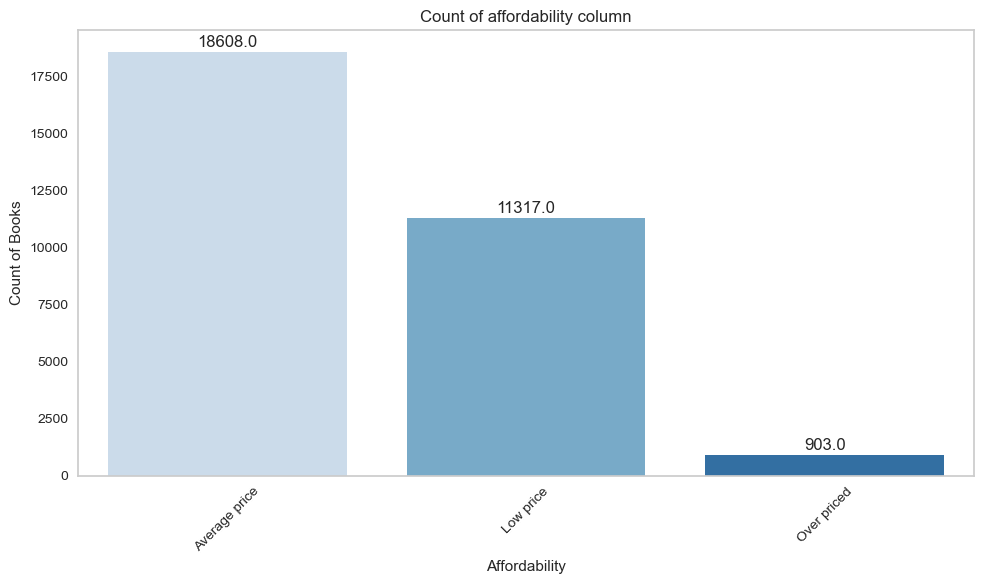

In [39]:
# lets visualize the new column
plt.figure(figsize=(10,6))
x = df['affordability'].value_counts().sort_values(ascending=False)
bars=sns.barplot(x=x.index,y=x.values,palette='Blues')

for bar in bars.patches:
    plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
             xytext=(0, 1.25), 
             textcoords="offset points",
             ha='center', va='bottom')
    
plt.title('Count of affordability column')
plt.xlabel('Affordability')
plt.ylabel('Count of Books')
plt.xticks(rotation = 45) 
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

**Why a new col 'affordability'?**
* simplifying the model processing, by this approach we can reduce the distinct prices of the price range or the price columns and use it as a categorical feature that can help in clustering.
* this approach is furitful in the encoding part (step-5) as this column will convey the information we want (price-range) and will be simple to encode by using label encoding
* the idea here is to minimise the number of columns at hand, but this approach can also mean that we might end up using less features compromising our cluster. so for now, we might or might not consider using the availability column.

**Saving the preprocessed dataset for further use**

In [40]:
#df.to_csv('preprocessed_data_40k.csv',index_label=False)

## graphs consumed more space in the notebook, so this cell needs to be run to view the plots

# Step 3: Data Visualization

Let's explore the variables and find how they are distributed across our dataset.

Firstly, we will plot __'Book's Publication Distribution'__ as per __'Years'__

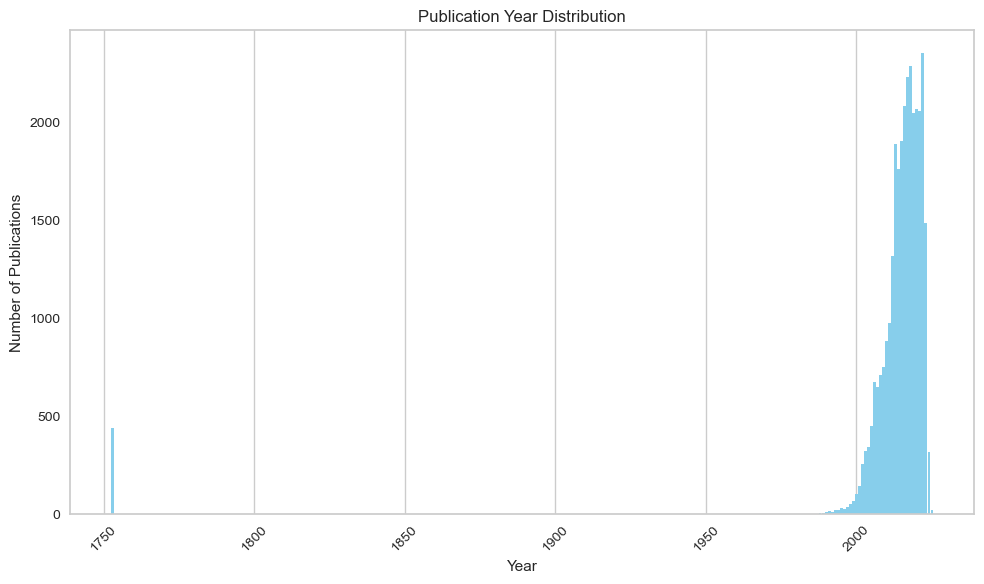

In [41]:
# Count the occurrences of each year
yr_counts = df['pub_year'].value_counts().sort_index()

plt.figure(figsize = (10, 6))
plt.bar(yr_counts.index, yr_counts.values, color = 'skyblue')
plt.title('Publication Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation = 45) 
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [42]:
# Bar Plot
plt.figure(figsize = (12, 6))
b_plot = sns.countplot(x = 'pub_year', data = df)
b_plot.set_title('Publication Year Distribution (1753-2024)')
b_plot.set_xlabel('Year')
b_plot.set_ylabel('Number of Publications')
b_plot.set_xticklabels(b_plot.get_xticklabels(), rotation = 45, ha = 'right')
sns.despine()

In [43]:
plt.figure(figsize = (18, 7))
b_plot = sns.countplot(x = 'pub_year', data = df)
b_plot.set_title('Publication Year Distribution (1753-2024)', fontdict = {'fontsize': 22})
b_plot.set_xlabel('Year', fontdict = {'fontsize': 20})
b_plot.set_ylabel('Number of Publications', fontdict={'fontsize': 16})
b_plot.set_xticklabels(b_plot.get_xticklabels(), rotation = 45, ha = 'right')
sns.despine()

# Adding count values on top of each bar
for p in b_plot.patches:
    b_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')

According to the book's publication year data, 
- the highest number of computer books were published in the year '2022' i.e., 2350, followed by 2285 in '2018'
- only one book was published in two years (1980 and 1987)
- However, 316 books were published till now in this year
- Insignificant data for the year 2025 as it is yet to publish

Now, we will plot the __'number of books'__ belonging to the particular __'price'__ ranges

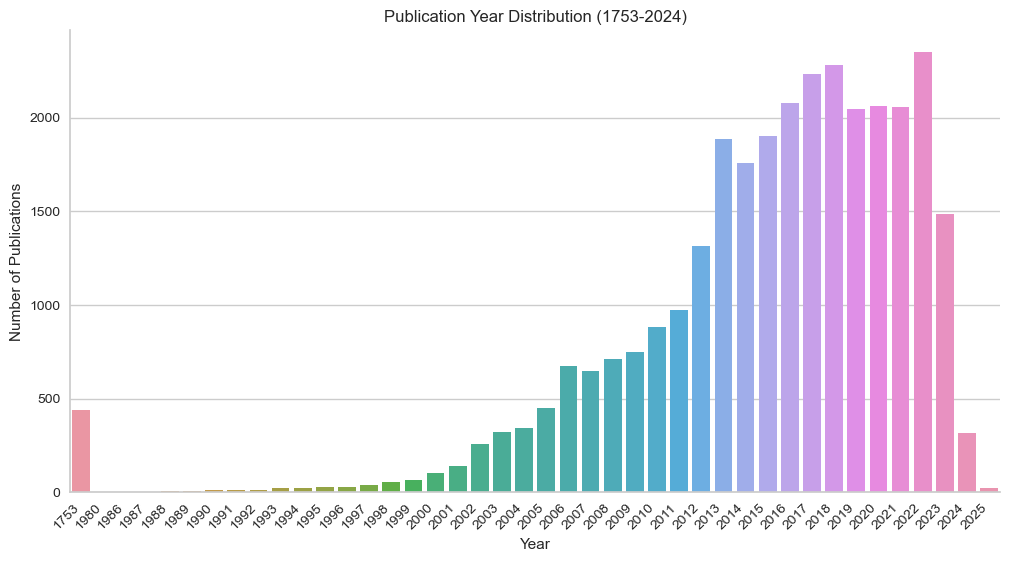

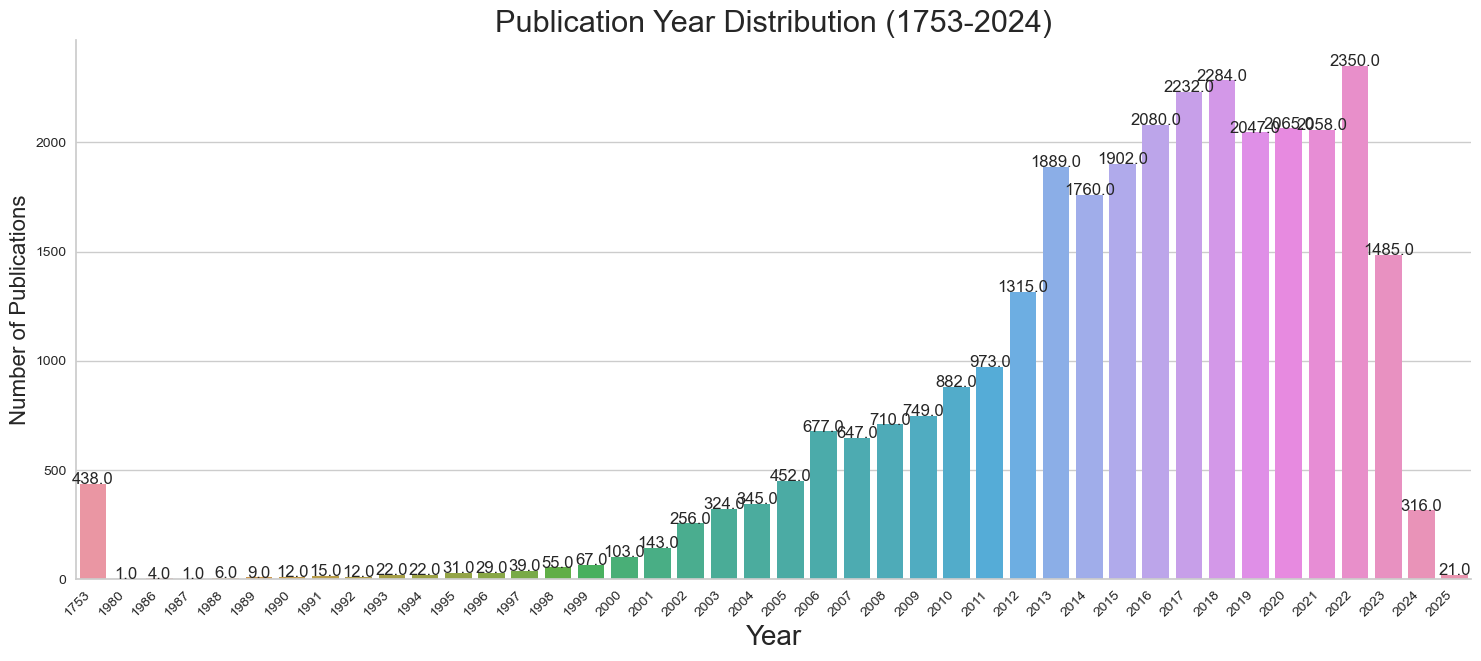

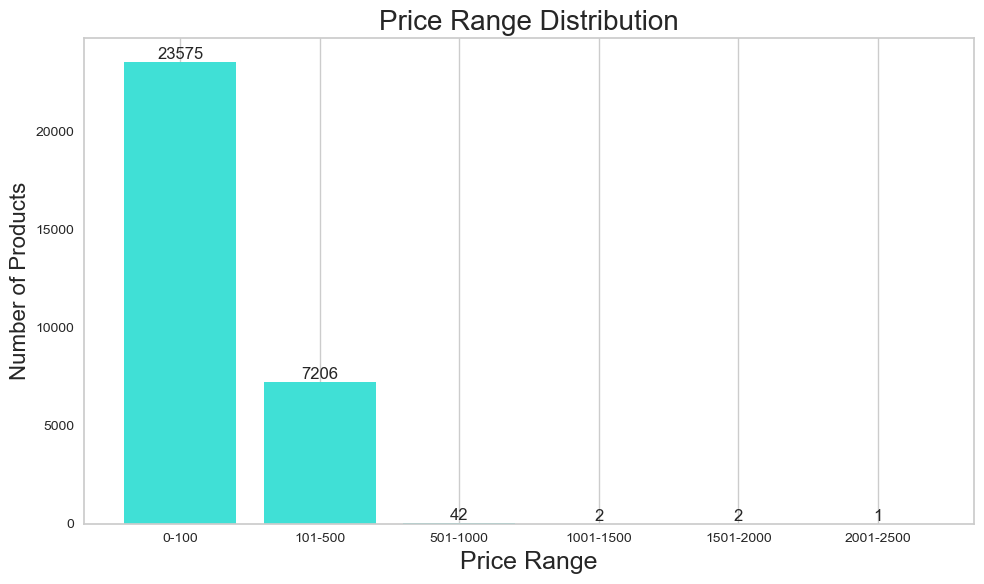

In [44]:
# defining the bins for distinct price ranges
pr_bins = [0, 100, 500, 1000, 1500, 2000, 2500]

# creating labels for the bins
pr_labels = ['0-100', '101-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']

# creating a new column with the bin labels based on the 'price' column
df['price_range'] = pd.cut(df['price'], bins = pr_bins, labels = pr_labels, right = False)

# grouping by price range and count the occurrences
pr_count = df['price_range'].value_counts().sort_index()

# finally, plotting the bar graph
plt.figure(figsize = (10, 6))
bars = plt.bar(pr_count.index, pr_count.values, color = '#40E0D6')
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# adding the count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

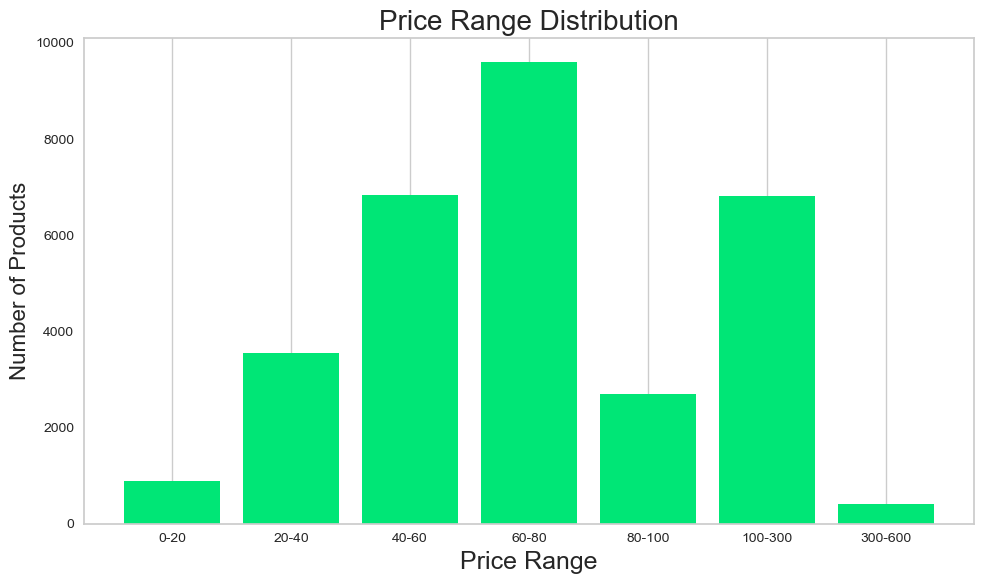

In [45]:
pr_bins = [0, 20, 40, 60, 80, 100, 300, 600]
pr_labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-300', '300-600']
df['price_range'] = pd.cut(df['price'], bins = pr_bins, labels = pr_labels, right = False)
pr_counts = df['price_range'].value_counts().sort_index()
plt.figure(figsize = (10, 6))
plt.bar(pr_counts.index, pr_counts.values, color = '#00E676')
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

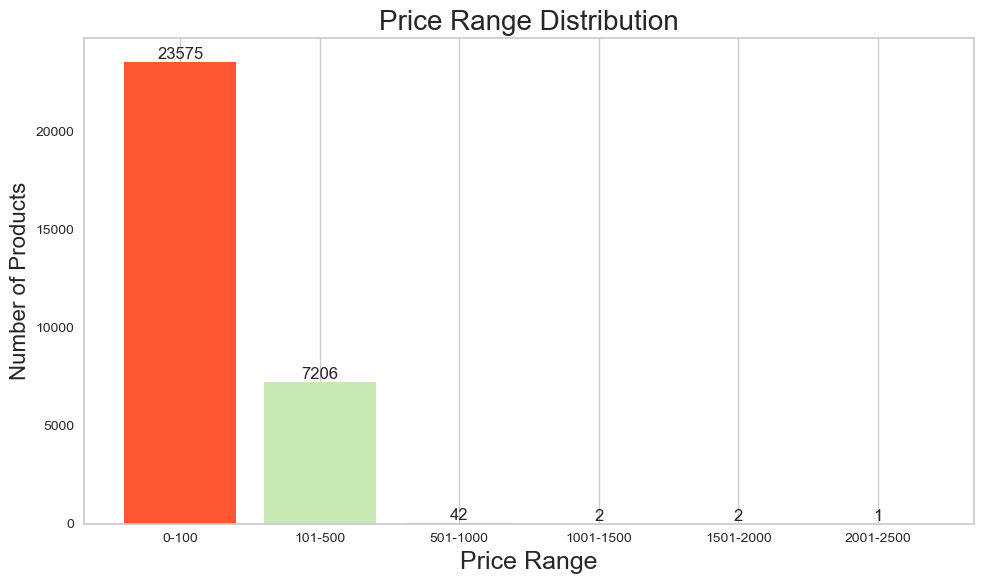

In [46]:
colors = ['#FF5733', "#c7e9b4", '#EE98AA', '#40E0D0', '#9B59B6', '#FFC300', '#00E676']
plt.figure(figsize = (10, 6))
bars = plt.bar(pr_count.index, pr_count.values, color = colors)
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

- We can notice that the majority of the books fall between the range of __60 - 80 dollars__ which is quite a good price to buy.

Lets check the __'availability status'__ of books

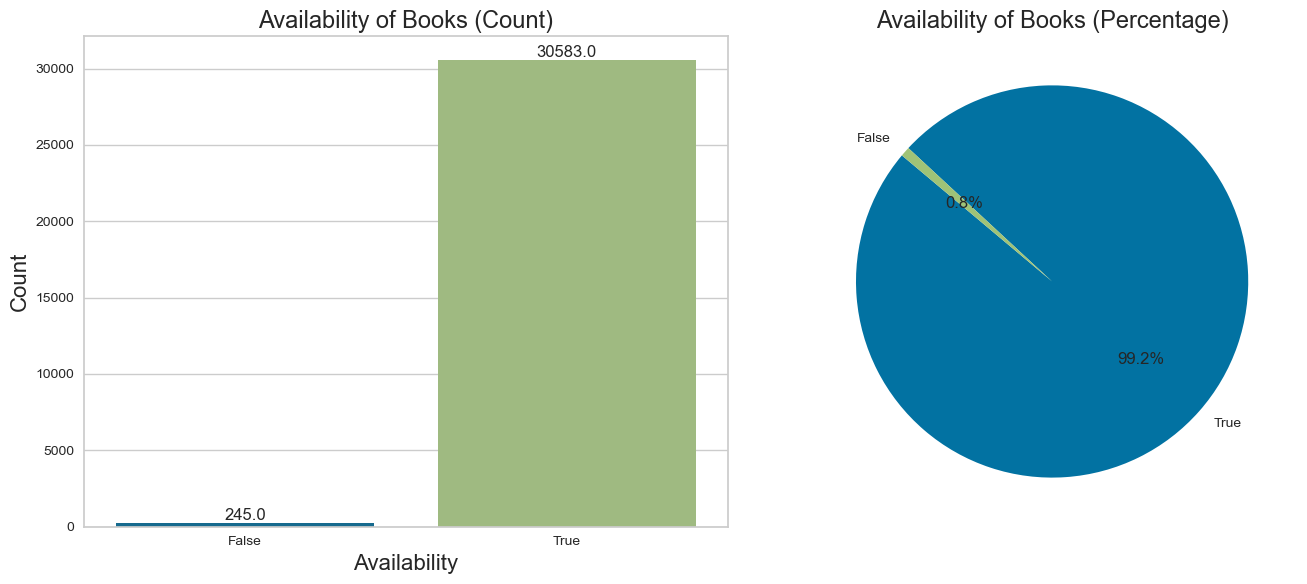

In [47]:
av_counts = df['availabe'].value_counts()

# creating the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

# plotting the bar graph
sns.barplot(x = av_counts.index, y = av_counts.values, ax = ax1)
ax1.set_title('Availability of Books (Count)', fontdict = {'fontsize': 17})
ax1.set_xlabel('Availability', fontdict = {'fontsize': 16})
ax1.set_ylabel('Count', fontdict = {'fontsize': 16})

# displaying count on top of each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords='offset points')

# plotting the pie chart
ax2.pie(av_counts.values, labels = av_counts.index, autopct = '%1.1f%%', startangle = 140)
ax2.set_title('Availability of Books (Percentage)', fontdict = {'fontsize': 17})

plt.tight_layout()
plt.show()

From our pie chart, we can see that almost all books are available as __99.2 %__ of books are __in stock__, whereas only __0.8 %__ are __not available__.

Let's do some analysis on our __Top 10 authors as per their number of books published__.

In [48]:
# unique number of authors in our dataset
len(list(df['author'].unique()))

20384

In [49]:
# unique number of publishers in our dataset
len(list(df['publisher'].unique()))

194

In [50]:
# count of unique values under publisher feature
df['publisher'].value_counts()

Springer International Publishing    8432
Packt Publishing                     3923
Apress                               3061
CRC Press                            2719
Springer Berlin Heidelberg           2350
                                     ... 
TeeBooks                                1
Stonesong Digital LLC                   1
Tsunami Productions                     1
NYU Press                               1
University of Chicago Press             1
Name: publisher, Length: 194, dtype: int64

In [51]:
# count of unique values under author feature
df['author'].value_counts()

Guy Hart-Davis           44
Paul McFedries           43
Michael R. Miller        43
Matthew MacDonald        41
Osvaldo Gervasi          38
                         ..
Gregory Kipper            1
Benjamin A. Lieberman     1
Reynolds M. Salerno       1
Jonathan S. Held          1
Jérôme Lang               1
Name: author, Length: 20384, dtype: int64

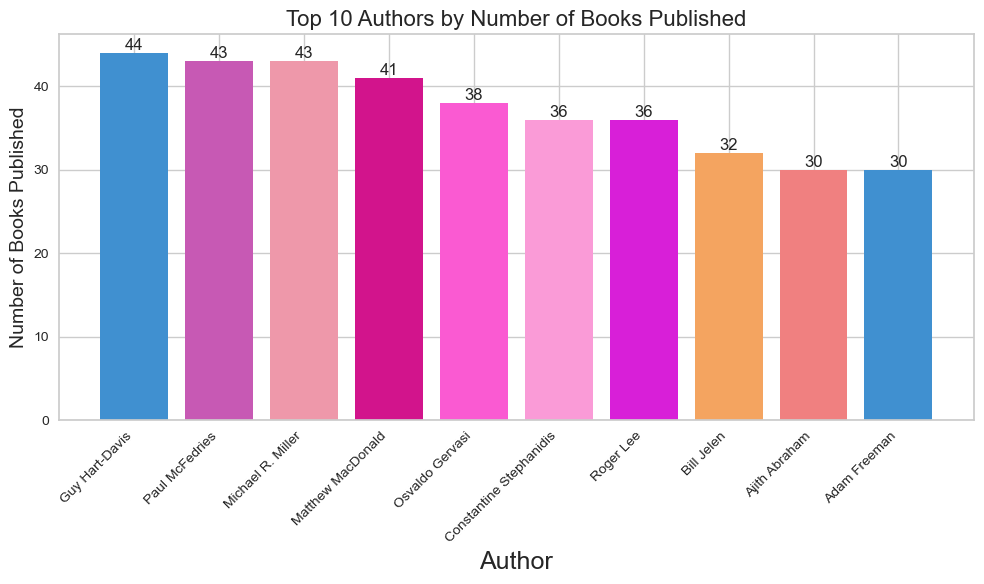

In [52]:
# visualizing the top 10 authors based on the number of publications made in the whole dataset
ar_counts = df['author'].value_counts().head(10)

colors = ['#4090D0','#C759B4', '#EE98AA', '#D2148C', '#FA5AD2','#FA9BD7', '#D81FD8','#F4A460','#F08080']

plt.figure(figsize = (10, 6))
bars = plt.bar(ar_counts.index, ar_counts.values, color = colors)
plt.title('Top 10 Authors by Number of Books Published', fontdict = {'fontsize': 16})
plt.xlabel('Author', fontdict = {'fontsize': 18})
plt.ylabel('Number of Books Published', fontdict = {'fontsize': 14})
plt.xticks(rotation = 45, ha = 'right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

Now, Lets generate a bar plot showing the __distribution of editions__ based on the __counts.__

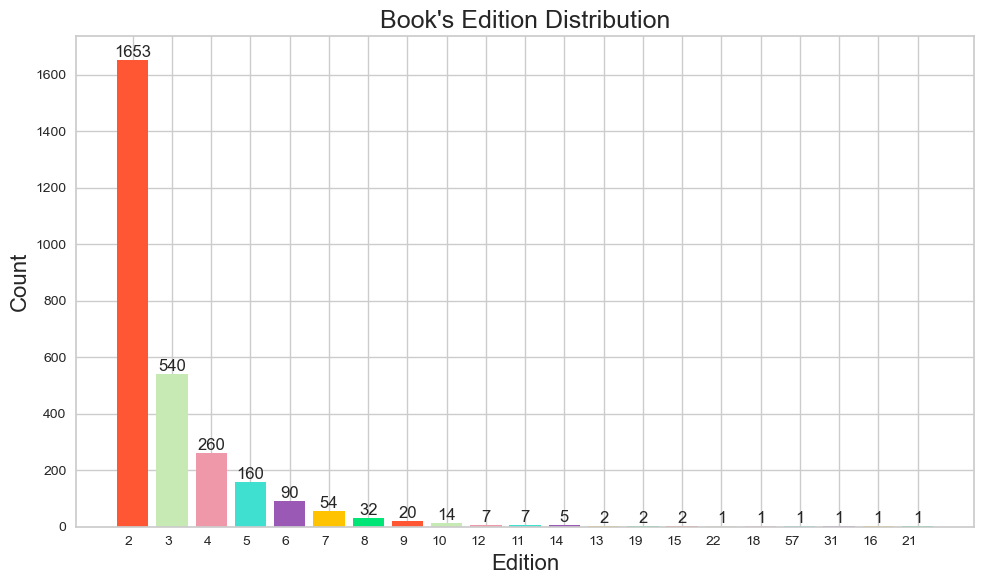

In [53]:
en_counts = df['edition'].value_counts()

colors = ['#FF5733', "#c7e9b4", '#EE98AA', '#40E0D0', '#9B59B6', '#FFC300', '#00E676']

plt.figure(figsize=(10, 6))
bars = plt.bar(en_counts.index, en_counts.values, color = colors)
plt.title("Book's Edition Distribution", fontdict = {'fontsize': 18})
plt.xlabel('Edition', fontdict = {'fontsize': 16})
plt.ylabel('Count', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0, ha = 'right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

- Here, we can noticed that the majority of the books belong to 'Edition 2' which is 1653, followed by 'Edition 3' with count of 540.
- However, just single book belong to edition numbers 22, 18, 57, 31, 16 and 21 respectively.

Lets visualize the __top eight mostly used words__ in __'description' column__

In [54]:
# Creating a counter to check most frequent words
from collections import Counter
c = Counter()
for txt in df.processed_description.values:
    for word in txt.split():
        c[word] += 1
c.most_common(8)

[('book', 13426),
 ('conference', 6090),
 ('held', 5634),
 ('international', 5477),
 ('papers', 5104),
 ('proceedings', 5007),
 ('constitutes', 4834),
 ('data', 4648)]

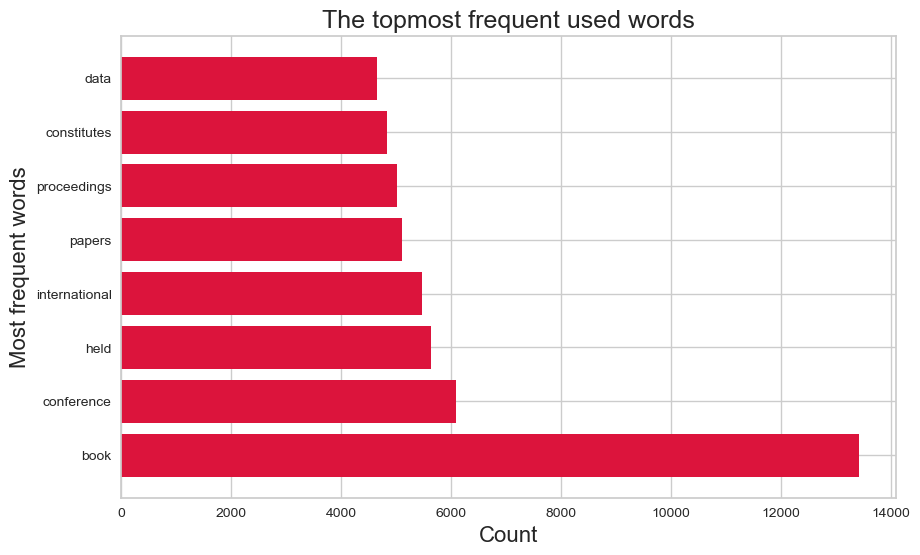

In [55]:
y = [count for x, count in c.most_common(8)]
x = [x for x, count in c.most_common(8)]
plt.figure(figsize = (10, 6))
plt.barh(x, y, color = 'crimson')
plt.title("The topmost frequent used words", fontdict = {'fontsize': 18})
plt.xlabel('Count', fontdict = {'fontsize': 16})
plt.ylabel("Most frequent words", fontdict = {'fontsize': 16})
plt.show()

__Function to create a Word Cloud__

The most frequent words in our 'processed_title' feature

In [56]:
t = ' '.join(word for word in df['processed_title'].astype(str)) 

In [57]:
def word_cloud(text):
    word_cloud = WordCloud(width = 1600, height = 800, random_state = 21,
                           max_font_size = 110, collocations=False,
                           min_font_size = 18).generate_from_text(t)
    plt.figure(figsize = (15, 10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

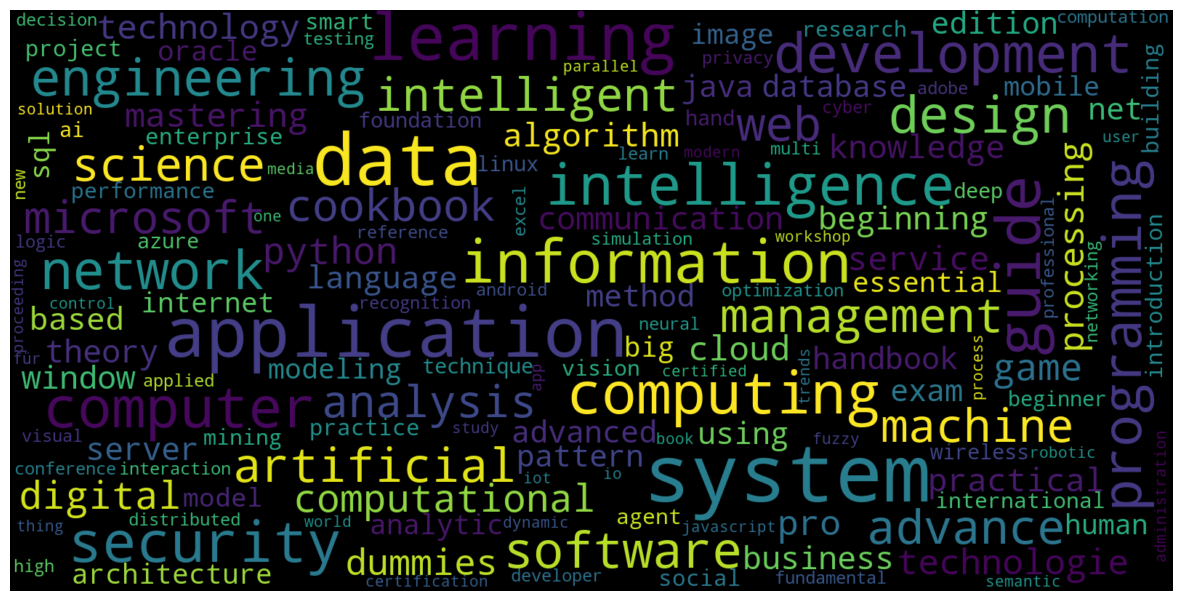

In [58]:
word_cloud(word_cloud)

In [59]:
# finding the length words in description column 
df['Length_of_description'] = df['description'].apply(lambda x: len(str(x)) if pd.notna(x) else np.nan)

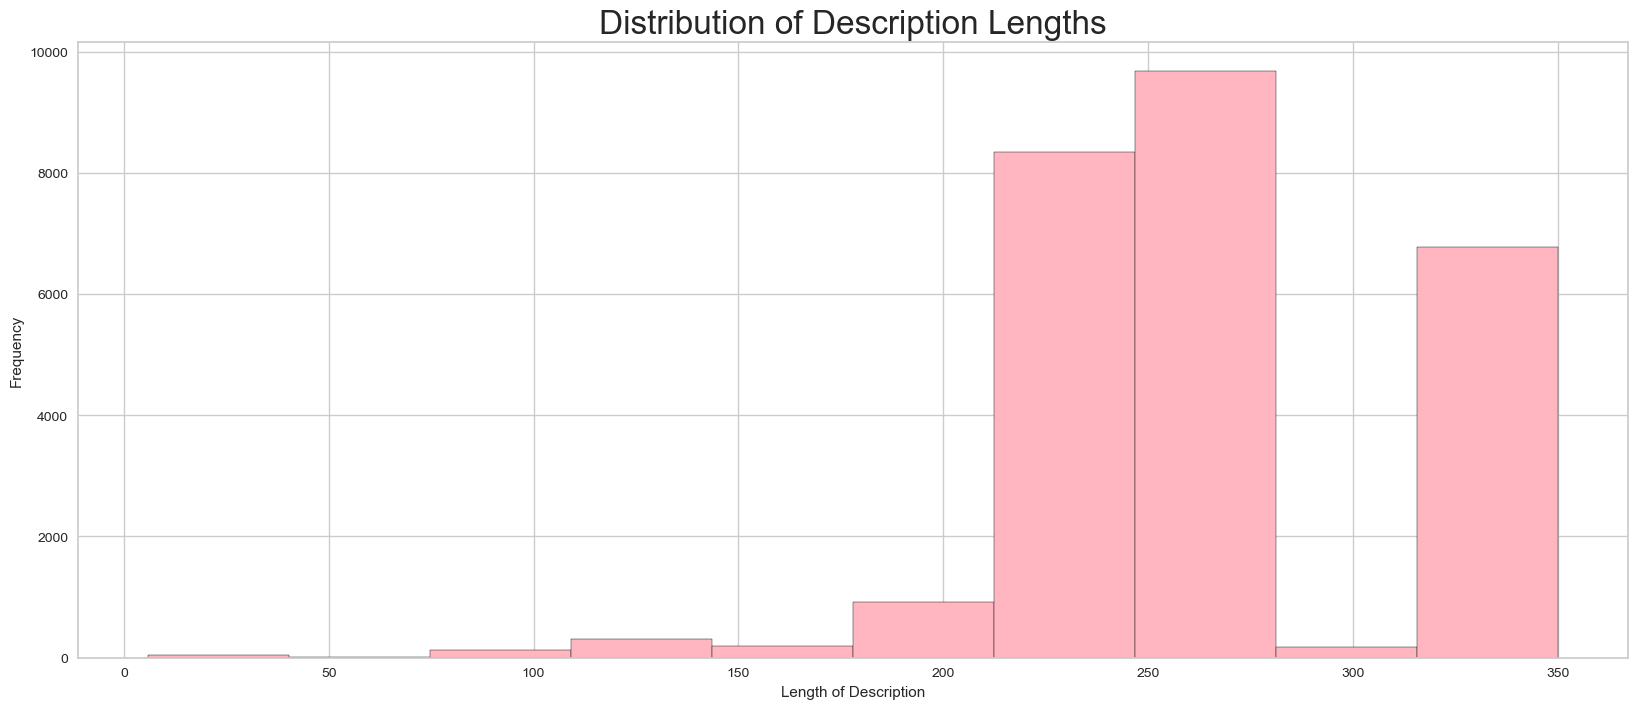

In [60]:
# distribution of length of description
plt.figure(figsize=(20, 8))
plt.hist(df['Length_of_description'].dropna(), color='lightpink', edgecolor='black')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.title('Distribution of Description Lengths',fontdict={'fontsize':24})
plt.grid(True)
plt.show()

We notice that:

*Most of the descriptions are of the length 250, meaning the average length of descriptions is around 250 words.*

*this could be true as this is considered standard for a descripton to not be more than 250-350 words, which is also noticed in the distribution*

# Step 4: Pandas Profiling

Pandas Profiling is a tool used for EDA (Exploratory Data Analysis)

It provides comprehensive insights, enhances data quality

We get the following details by using pandas profiling:

- __Overview Report__
    - gives summary statistics of the dataset
    - Also, information on:
        - variables, 
        - observations, 
        - missing cells, 
        - duplicate rows,
        - datatypes, and
        - memory usage
- __Variable Summary__
    - provides descriptive statistics
        - mean,
        - minimum value,
        - maximum value, 
        - distinct values,  
        - missing values, 
        - zeros and negative value, etc
- __Correlation Analysis__
    - generates a correlation matrix &
    - correlation table
        - basically to identify relationships &
        - multicollinearity issues
- __Missing values__
    - generates
        - count of missing values (in bar graphs)
        - matrix
        - heatmap
- __Sample information__
    - First 10 rows of our dataset
    - Last 10 rows of our dataset
- Interactions

Lets use the __ydata-profiling__ to generate the detailed reports, complete with statistics and visualizations. 

In [61]:
# report=pp.ProfileReport(df)

In [62]:
# report.to_file('final_version.html')

In [63]:
# report

# Step 5: Encoding 

So far,

We cleaned the Dataset, made the cleaned dataset available to use.

We visualized important features from the dataset to get any insights and understand the data better.

**Now let us only consider features that are significant for our analysis and perform appropriate encoding strategies to have our data in the right format**

## Approach for encoding

* for '__price__' and '__pub_year__' since these are numeric and distinct in nature, but had so many unique values that conveyed the same meaning. we decided to create 2 new encoded features that accounted for the bins of the price and published year. hence we ended up using the binning up approach for these features.
* for '__year_of_sale__' we leave it as it is as distinct values of years can be considered a category in itself.
* for '__affordability__' we use label encoding as we are dealing with 3 different values inside affordability which are simply created as labels.
* for '__Available__' we can map the values to its numeric representation.

In [64]:
new_df =df[[
 'publisher',
 'pub_year',
 'sale_date',
 'year_of_sale',
 'num_of_author',
 'processed_title',
 'processed_description',
 'updated_price',
 'edition',
 'availabe','affordability']]

## Encoding for affordability

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
new_df['affordability'] = le.fit_transform(new_df['affordability'])

In [68]:
le.classes_

array(['Average price', 'Low price', 'Over priced'], dtype=object)

In [69]:
new_df['affordability'].unique()

array([0, 1, 2])

**Here**:
* '__Average Price__' is changed to 0.
* '__Low Price__' is changed to 1.
* '__Over Price__' is changed to 2.

## Encoding for Availability

In [70]:
# here we convert true to 1 and false to 0
new_df['availabe'] = df['availabe'].astype(int)

In [71]:
# checking the balance of values inside available column as this is a potential feature for our analysis
print(new_df['availabe'].value_counts(dropna=False,normalize=True)*100) 

1    99.205268
0     0.794732
Name: availabe, dtype: float64


**Creating a copy of the dataframe to have convenience in updation and processing of data**

In [72]:
df_5=new_df

In [73]:
# a quick look at the copy of the new dataframe
df_5.head(1)

,publisher,pub_year,sale_date,year_of_sale,num_of_author,processed_title,processed_description,updated_price,edition,availabe,affordability
0,O'Reilly Media,2024,2024-01-10,2024,1,learning go,go rapidly become preferred language building ...,71.99,2,1,0


In [74]:
# understanding the number of unique values in each feature after initial encoding
columns = df_5.columns.to_list()
# check of unique values after discretization
for column in columns:
    print("{} has {} unique values".format(column,df_5[column].nunique()))
    
#use this for report

publisher has 194 unique values
pub_year has 42 unique values
sale_date has 6476 unique values
year_of_sale has 42 unique values
num_of_author has 24 unique values
processed_title has 24823 unique values
processed_description has 25520 unique values
updated_price has 1274 unique values
edition has 21 unique values
availabe has 2 unique values
affordability has 3 unique values


In [75]:
df_5.nunique(dropna=False)

publisher                  194
pub_year                    42
sale_date                 6476
year_of_sale                42
num_of_author               24
processed_title          24823
processed_description    25520
updated_price             1274
edition                     22
availabe                     2
affordability                3
dtype: int64

## Encoding for updated price and pub year

In [76]:
#using mode to find the most freq(repeating) value in each column in price and year
# optional, can remove
to_get_value_bin= df_5[['updated_price','pub_year']].apply(lambda x: x.mode().tolist())
print(to_get_value_bin)

   updated_price  pub_year
0          72.64      2022


In [77]:
df_5[['updated_price','pub_year']].quantile(np.arange(.01,.9,.1))

,updated_price,pub_year
0.01,8.6542,1753.0
0.11,36.0000,2007.0
0.21,47.5200,2011.0
0.31,54.3000,2013.0
0.41,64.6400,2015.0
0.51,72.6400,2016.0
0.61,72.6400,2018.0
0.71,85.0000,2019.0
0.81,126.5400,2021.0


In [78]:
"""from the observation of unqiue values present in the current df_5, publisher has 194 values --> this distinct will be difficult 
for encoding like one-hot as the dimensionality issue araises and creates zero in various columns (sparse matrix)
"""

'from the observation of unqiue values present in the current df_5, publisher has 194 values --> this distinct will be difficult \nfor encoding like one-hot as the dimensionality issue araises and creates zero in various columns (sparse matrix)\n'

In [79]:
price_bins = pd.cut(df_5.updated_price,bins=10 ,right=True)

In [80]:
price_bins.cat.codes

0        0
1        0
2        0
3        0
4        0
        ..
39977    0
39978    0
39979    0
39988    0
39989    0
Length: 30828, dtype: int8

In [81]:
price_bins.cat.codes.value_counts()

0    29658
1     1104
2       48
3       13
6        1
5        1
9        1
7        1
4        1
dtype: int64

In [82]:
# bifercating the prices under updated_price feature into categories using binning strategy
#divides the data into bins based on values given  and we used the qcut--> qunatile based binning with same number of bins 
price_bin_number,bin_range = pd.qcut(df_5['updated_price'], q=8, labels=False, duplicates='drop',retbins=True)
print(price_bin_number)

0        3
1        1
2        6
3        3
4        2
        ..
39977    3
39978    3
39979    7
39988    6
39989    3
Name: updated_price, Length: 30828, dtype: int64


In [83]:
# bifercating the prices under 'pub_year' feature into categories using binning strategy
year_bin_number,y_bin_range = pd.qcut(df_5['pub_year'], q=12, labels=False, duplicates='drop',retbins=True)
print(year_bin_number) 

0        11
1        11
2        10
3         6
4        11
         ..
39977     0
39978     0
39979     1
39988     0
39989     0
Name: pub_year, Length: 30828, dtype: int64


In [84]:
# creating our encoded price and year features
df_5['encoded_price']=price_bin_number
df_5['encoded_year']=year_bin_number

## Encoding for availability --> another approach that can be used

Since we were tyring to expand our knowledge for encoding of variables, we experimented with several approaches. one such approach is mentioned below.

In [85]:
#encoding categorical values 
# optional, can remove
df_5=pd.get_dummies(df_5, columns=['availabe'], prefix=['availability'],drop_first=True)
df_5.rename(columns={'availability_True':'availability_encoded'},inplace=True)


# Pipeline used to process textual data from some features in our dataframe utilized for our analysis

In [86]:
#description processing pipeline --> key words and TF-IDF
def key_words(text):
    """
    arg: text data

    function: applying lemmatization, NER and other tokenization technique

    return: text tokens
    """
    tokens = word_tokenize(text.lower())   
    lemma=WordNetLemmatizer()
    key_1 = [lemma.lemmatize(token) for token in tokens]
    
    #get most common words and also key words
    word_counts=Counter(key_1)
    freq_words=word_counts.most_common()
    common_=[word for word,cont in freq_words]
    key_words=key_1
    return key_words,common_

df_5['key_words'],df_5['common_word'] = zip(*df_5['processed_description'].apply(key_words))
df_5['length_title_description']=df_5['processed_title'].str.len()+df_5['processed_description'].str.len()
        

# Step 6: Outliers Detection

## Initial understanding of features before outlier detection

In [87]:
# function to get numerical features from our updated dataframe (after encoding)
def get_numeric_column_list(dataframe):
    col_list=dataframe.select_dtypes(include=['int64','float64']).columns.to_list()
    return col_list

In [88]:
df_5_num = get_numeric_column_list(df_5)
df_5_num 

['pub_year',
 'year_of_sale',
 'num_of_author',
 'updated_price',
 'encoded_price',
 'encoded_year',
 'length_title_description']

In [89]:
# function to get categorical features from our updated dataframe (after encoding)
def get_cat_column_list(dataframe):
    col_list=dataframe.select_dtypes(include=['category','object']).columns.to_list()
    return col_list

In [90]:
df_5_cat=get_cat_column_list(df_5)
df_5_cat 

['publisher',
 'processed_title',
 'processed_description',
 'edition',
 'key_words',
 'common_word']

In [91]:
# function to get the values of skewness and kurtosis
def get_skew(dataframe):
    return(dataframe[df_5_num].skew())

def get_kurtosis(dataframe):
    return(dataframe[df_5_num].kurtosis())

In [92]:
print(get_skew(df_5))
print("="*50+'\n')
print(get_kurtosis(df_5))

pub_year                    -7.808205
year_of_sale               -13.936303
num_of_author                3.818639
updated_price                4.790512
encoded_price                0.164453
encoded_year                 0.074813
length_title_description    -0.949223
dtype: float64

pub_year                     61.051632
year_of_sale                502.802417
num_of_author                53.046460
updated_price                75.308757
encoded_price                -1.219940
encoded_year                 -1.176322
length_title_description      0.430847
dtype: float64


###### Interpreting Skewness:

The distributions for 'pub_year' and 'year_of_sale' display substantial negative skewness, signifying a pronounced tail towards the left. This indicates that the bulk of data points are situated on the higher end of the scale.

The 'num_of_author' variable shows positive skewness, reflecting a distribution that tails off to the right.

The 'updated_price' variable also manifests positive skewness, which points to a clustering of data on the lower end with a tail stretching towards higher values.

The 'encoded_price' and 'encoded_year' variables exhibit skewness values nearing zero, denoting relatively even distributions.

A marginally negative skewness is noted for 'length_title_description', revealing a slight leftward tail.

###### Interpreting Kurtosis:

The 'pub_year' variable is characterized by a significantly positive kurtosis, denoting a very peaked distribution with thick tails, and a propensity for more outliers than a typical normal distribution.

The 'year_of_sale' variable shows an exceedingly high kurtosis, indicative of a distribution with thick tails and a notably sharp peak.

Both 'num_of_author' and 'updated_price' exhibit elevated kurtosis, suggesting distributions with noticeable peaks and substantial tail mass.

The 'encoded_price' is associated with a kurtosis value that is close to that of a normal distribution, implying a distribution that is neither too peaked nor too flat.

The 'encoded_year' presents a negative excess kurtosis, indicating a flatter distribution in comparison to a normal distribution, with thinner tails.

The variable 'length_title_description' has a kurtosis near zero, signifying a distribution with a peak and tail thickness that resemble those of a normal distribution.

## Outlier detection using IQR method

During our research, we came accross multiple methods for outlier detection, hence, we mentioned few appropriate methods both in terms of IQR and Visual plots for the best of our knowledge 

In [93]:
#IQR method--approach -1
#first simple method of understanding the data distributuin using quantile
df_5.quantile(np.arange(.1,1.1,.1),axis=0).T #plotting for all the 10percentile of the values

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
pub_year,2007.00,2011.00,2013.00,2015.00,2016.00,2018.00,2019.0,2021.00,2022.000,2025.00
year_of_sale,2007.00,2011.00,2013.00,2015.00,2016.00,2018.00,2019.0,2021.00,2022.000,2025.00
num_of_author,1.00,1.00,1.00,1.00,2.00,2.00,3.0,3.00,4.000,59.00
updated_price,35.15,45.99,53.86,63.82,72.64,72.64,83.3,117.31,172.784,2353.37
affordability,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.000,2.00
encoded_price,0.00,1.00,2.00,3.00,3.00,3.00,5.0,6.00,7.000,7.00
encoded_year,1.00,2.00,3.00,4.00,5.00,7.00,7.0,9.00,10.000,11.00
availability_1,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.000,1.00
length_title_description,43.00,177.00,198.00,210.00,220.00,231.00,246.0,267.00,295.000,489.00


In [94]:
#IQR method--approach-2
out={}
for col in df_5_num:
    q1=df_5[col].quantile(.25).round(2)
    q2=df_5[col].median()
    q3=df_5[col].quantile(.75).round(2)
    iqr=(q3-q1).round(2)
    lw=(q1-(1.5*iqr)).round(2)
    uw=(q1+(1.5*iqr)).round(2)
    
    out[col]={"IQR":iqr,"Lower_whisker":lw,"quater1":q1,"mid":q2,"quater3":q3,"upper_whisker":uw}

In [95]:
# printing the quartile bound values for each column in our dataframe
for i,j in out.items():
    print(i,"\n")
    for ii,jj in j.items():
        print("{} : {}".format(ii,jj))
    print()
    print("="*50)

pub_year 

IQR : 8.0
Lower_whisker : 2000.0
quater1 : 2012.0
mid : 2016.0
quater3 : 2020.0
upper_whisker : 2024.0

year_of_sale 

IQR : 8.0
Lower_whisker : 2000.0
quater1 : 2012.0
mid : 2016.0
quater3 : 2020.0
upper_whisker : 2024.0

num_of_author 

IQR : 2.0
Lower_whisker : -2.0
quater1 : 1.0
mid : 2.0
quater3 : 3.0
upper_whisker : 4.0

updated_price 

IQR : 44.45
Lower_whisker : -16.69
quater1 : 49.99
mid : 72.64
quater3 : 94.44
upper_whisker : 116.67

encoded_price 

IQR : 4.0
Lower_whisker : -5.0
quater1 : 1.0
mid : 3.0
quater3 : 5.0
upper_whisker : 7.0

encoded_year 

IQR : 6.0
Lower_whisker : -7.0
quater1 : 2.0
mid : 5.0
quater3 : 8.0
upper_whisker : 11.0

length_title_description 

IQR : 66.0
Lower_whisker : 91.0
quater1 : 190.0
mid : 220.0
quater3 : 256.0
upper_whisker : 289.0



## Detecting outliers visually

In [96]:
# to check outliers visually-approach-1
def check_cols(col, df):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1,3, figsize=(24,8))
    
    fig.suptitle(f'Distribution, box and probability plots: {col}', fontsize=24)
    
    sns.distplot(df[col],ax=axes[0],label='Skew noticed = {:.2f}'.format(df[col].skew()))
    axes[0].set_title(f'Distribution: ',fontsize=16)
    
    
    sns.boxplot(df[col],ax=axes[1])
    axes[1].set_title(f'Boxplot:',fontsize=16)
    
    stats.probplot(df[col],plot=axes[2],fit=True)
    axes[2].set_title(f'Probplot:',fontsize=16)
    
    plt.tight_layout()
    plt.show()

__Why Probplot?__

>probplot or Q-Q plot is normally used to visualise probability distribution of data. but, can also be used to detect outliers indirectly.
probplot has a line called the reference line, which denotes the expected theoretical distribution. If the data points fall approximately along a straight line on the Q-Q plot, it indicates that the data follows the specified distribution.

> with this insight, we can infere that for all the data points that deviate significantly from the reference line can be considered outliers. this is an interesting technique we came across and ended up utilizing in our project

In [97]:
cols = ['updated_price','pub_year','availabe','year_of_sale','affordability']

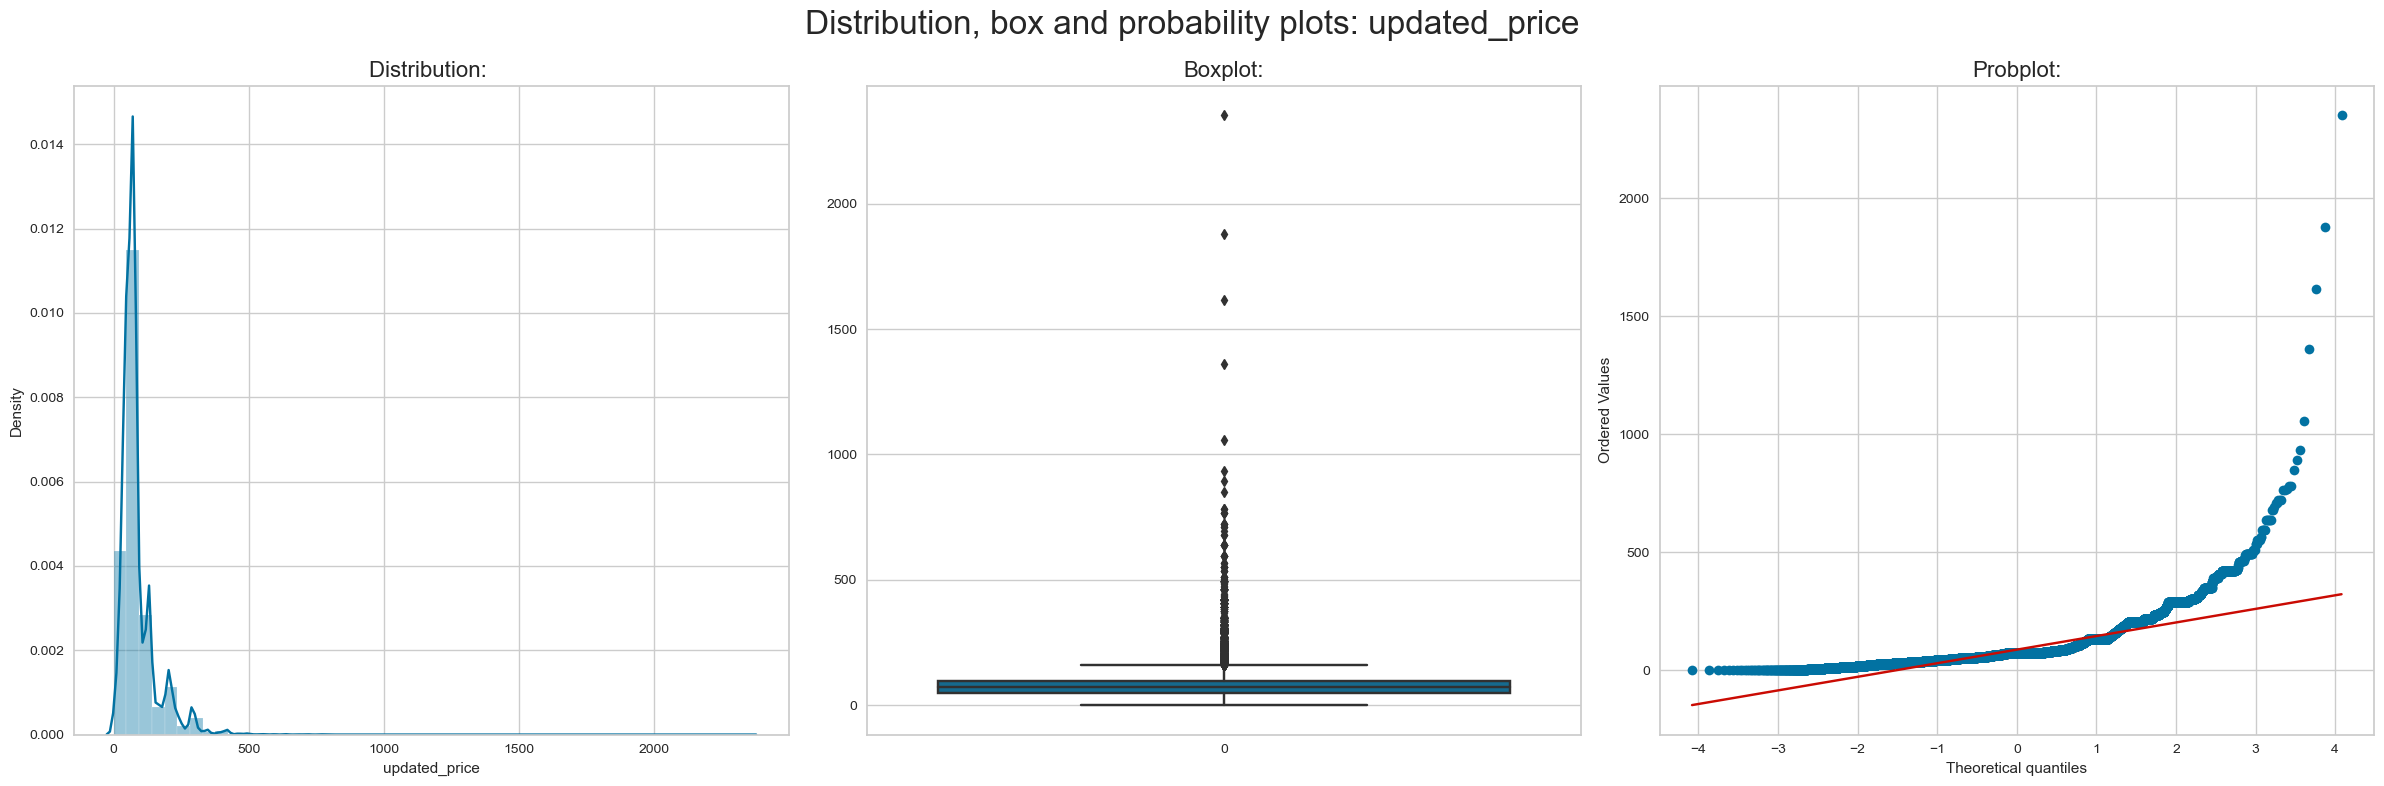

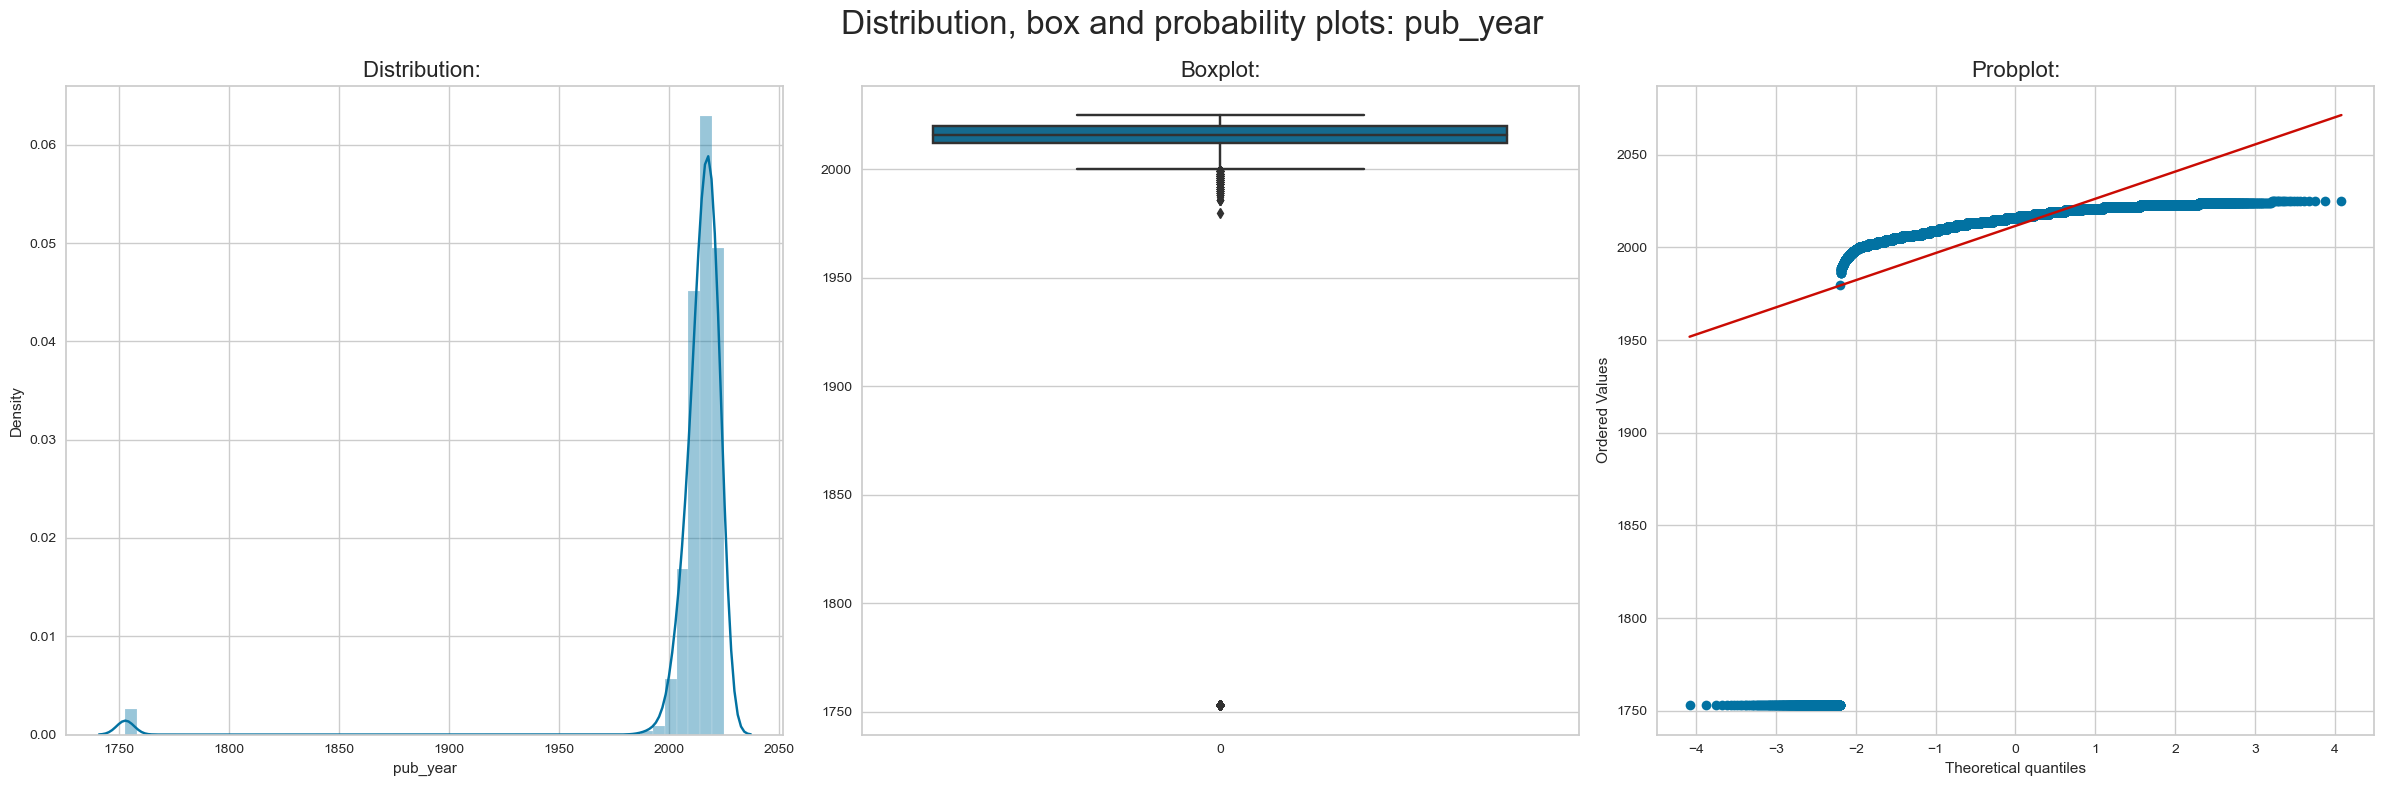

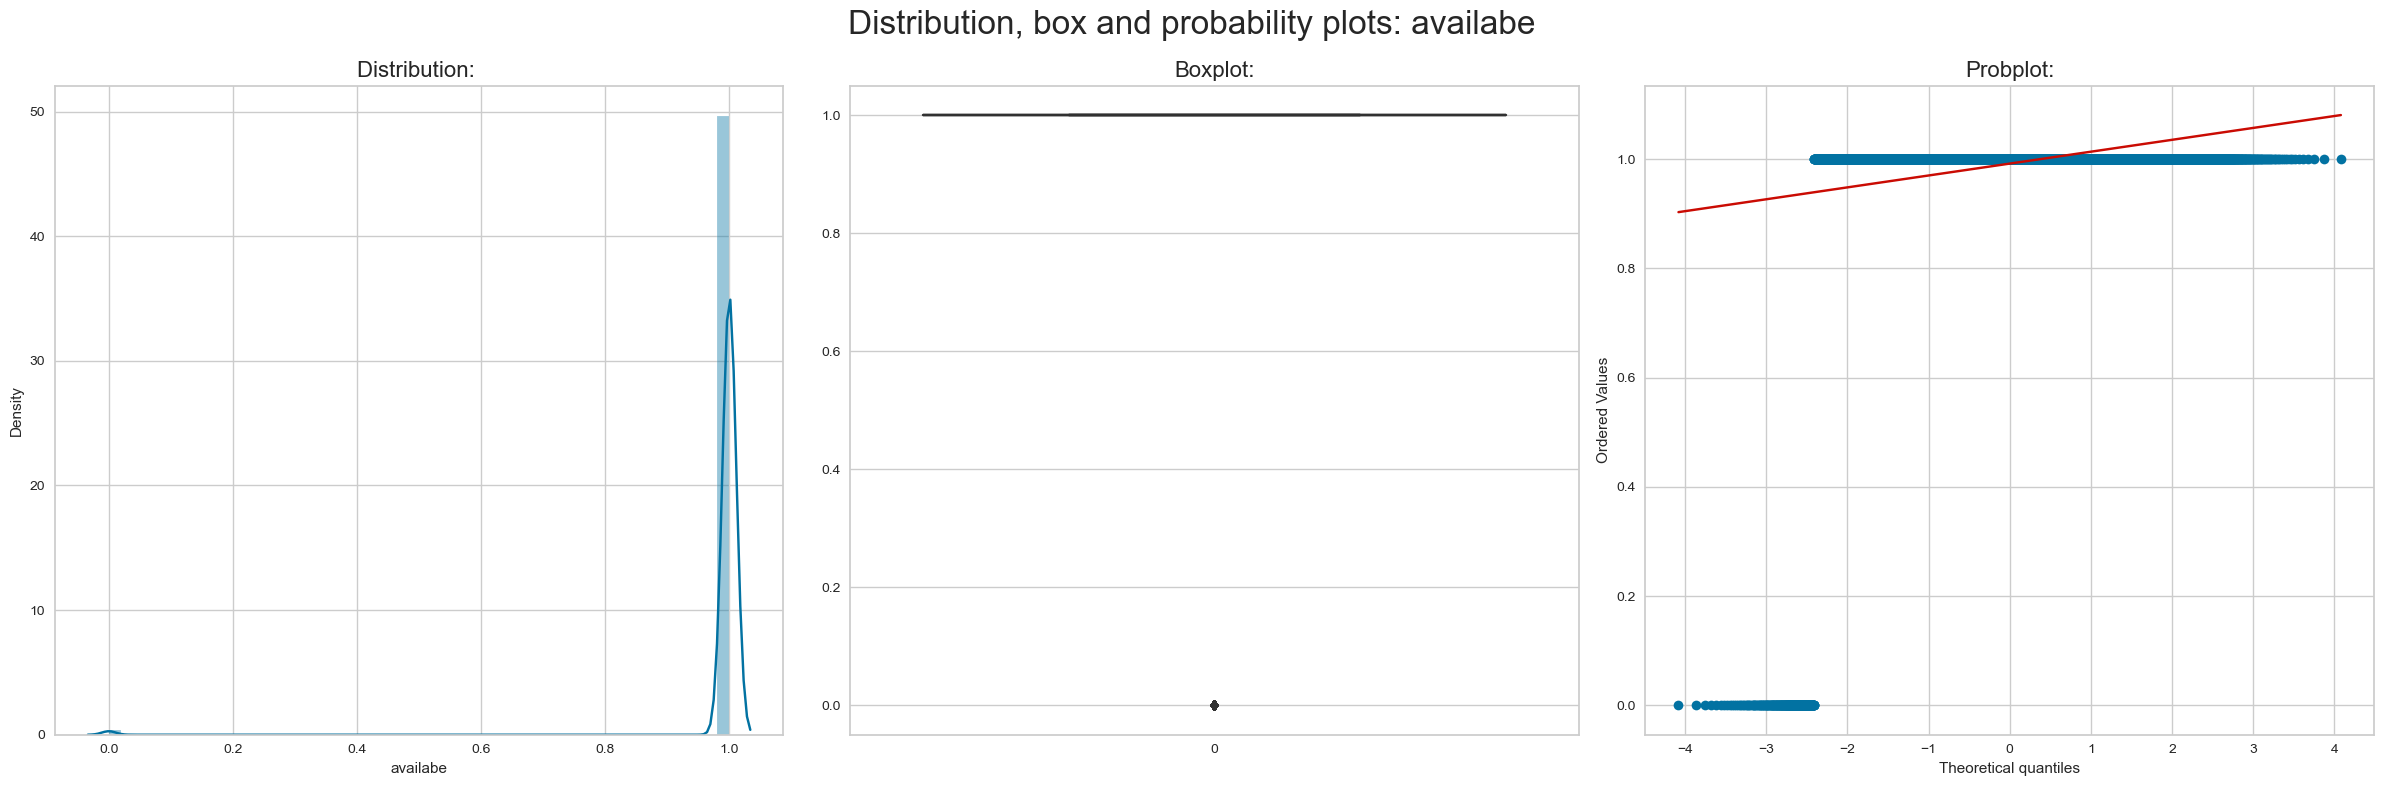

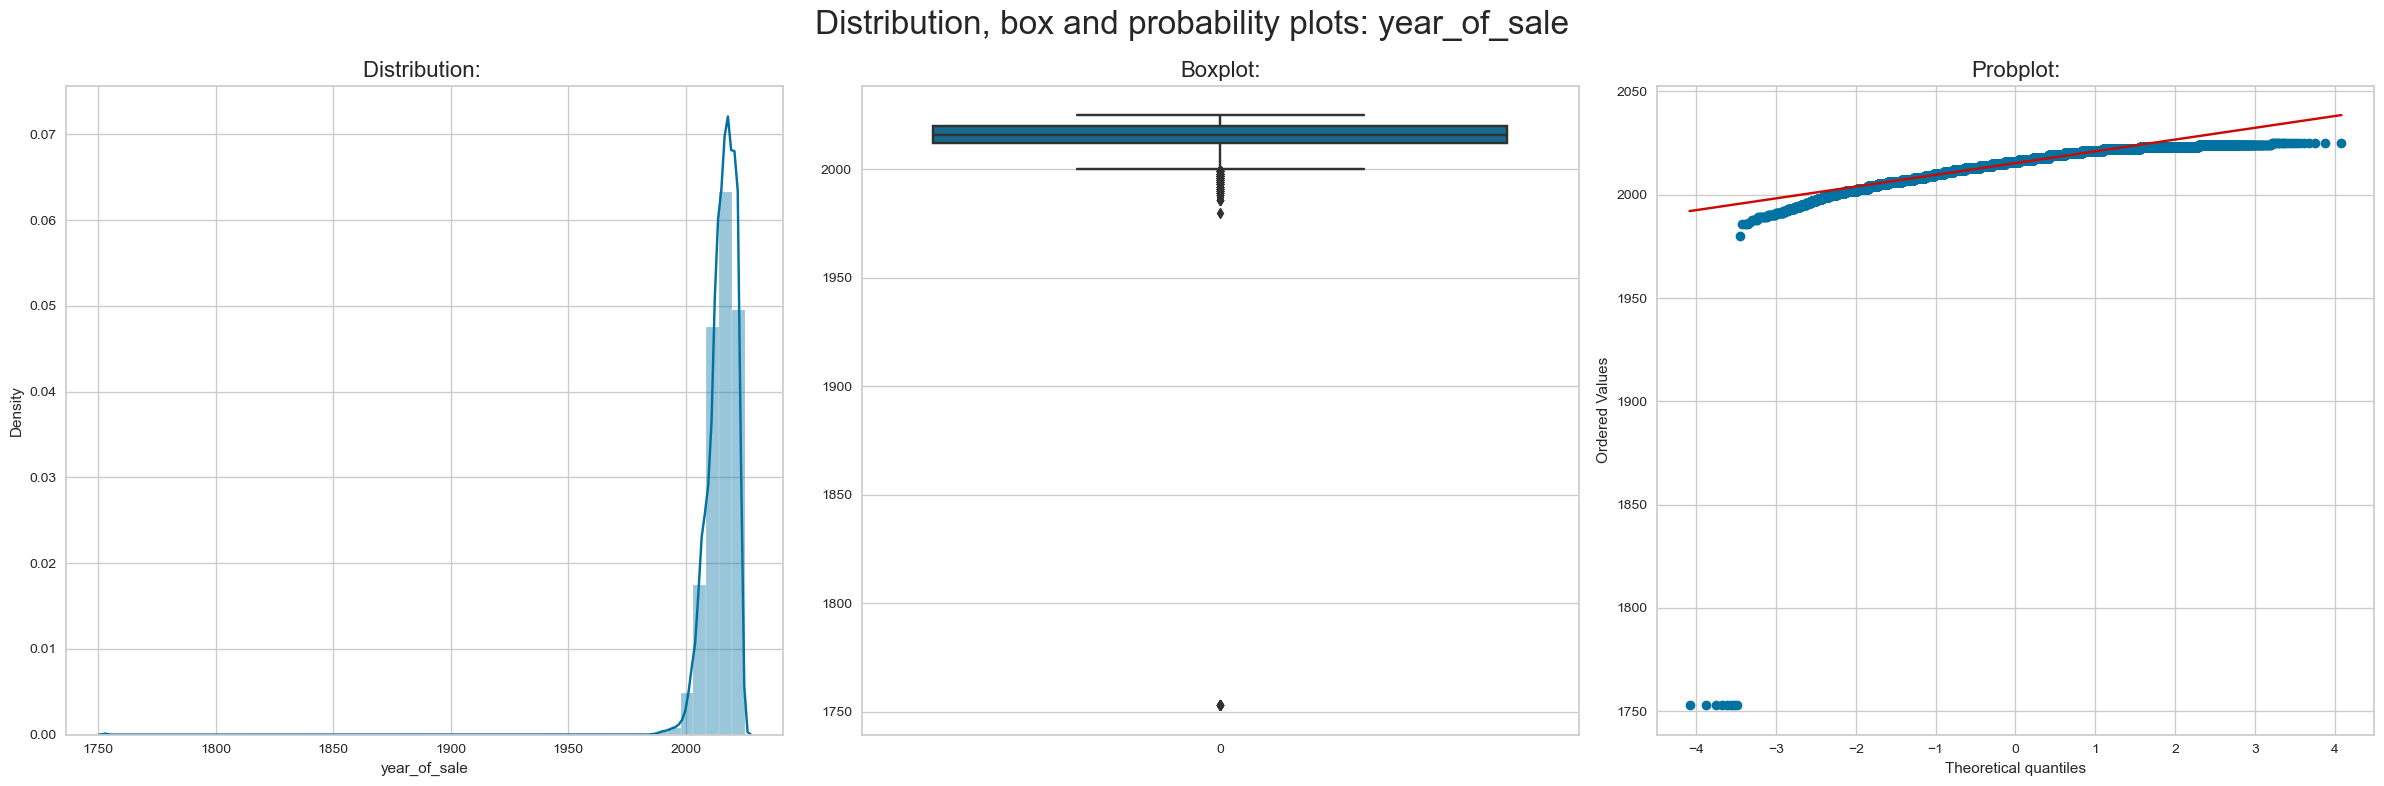

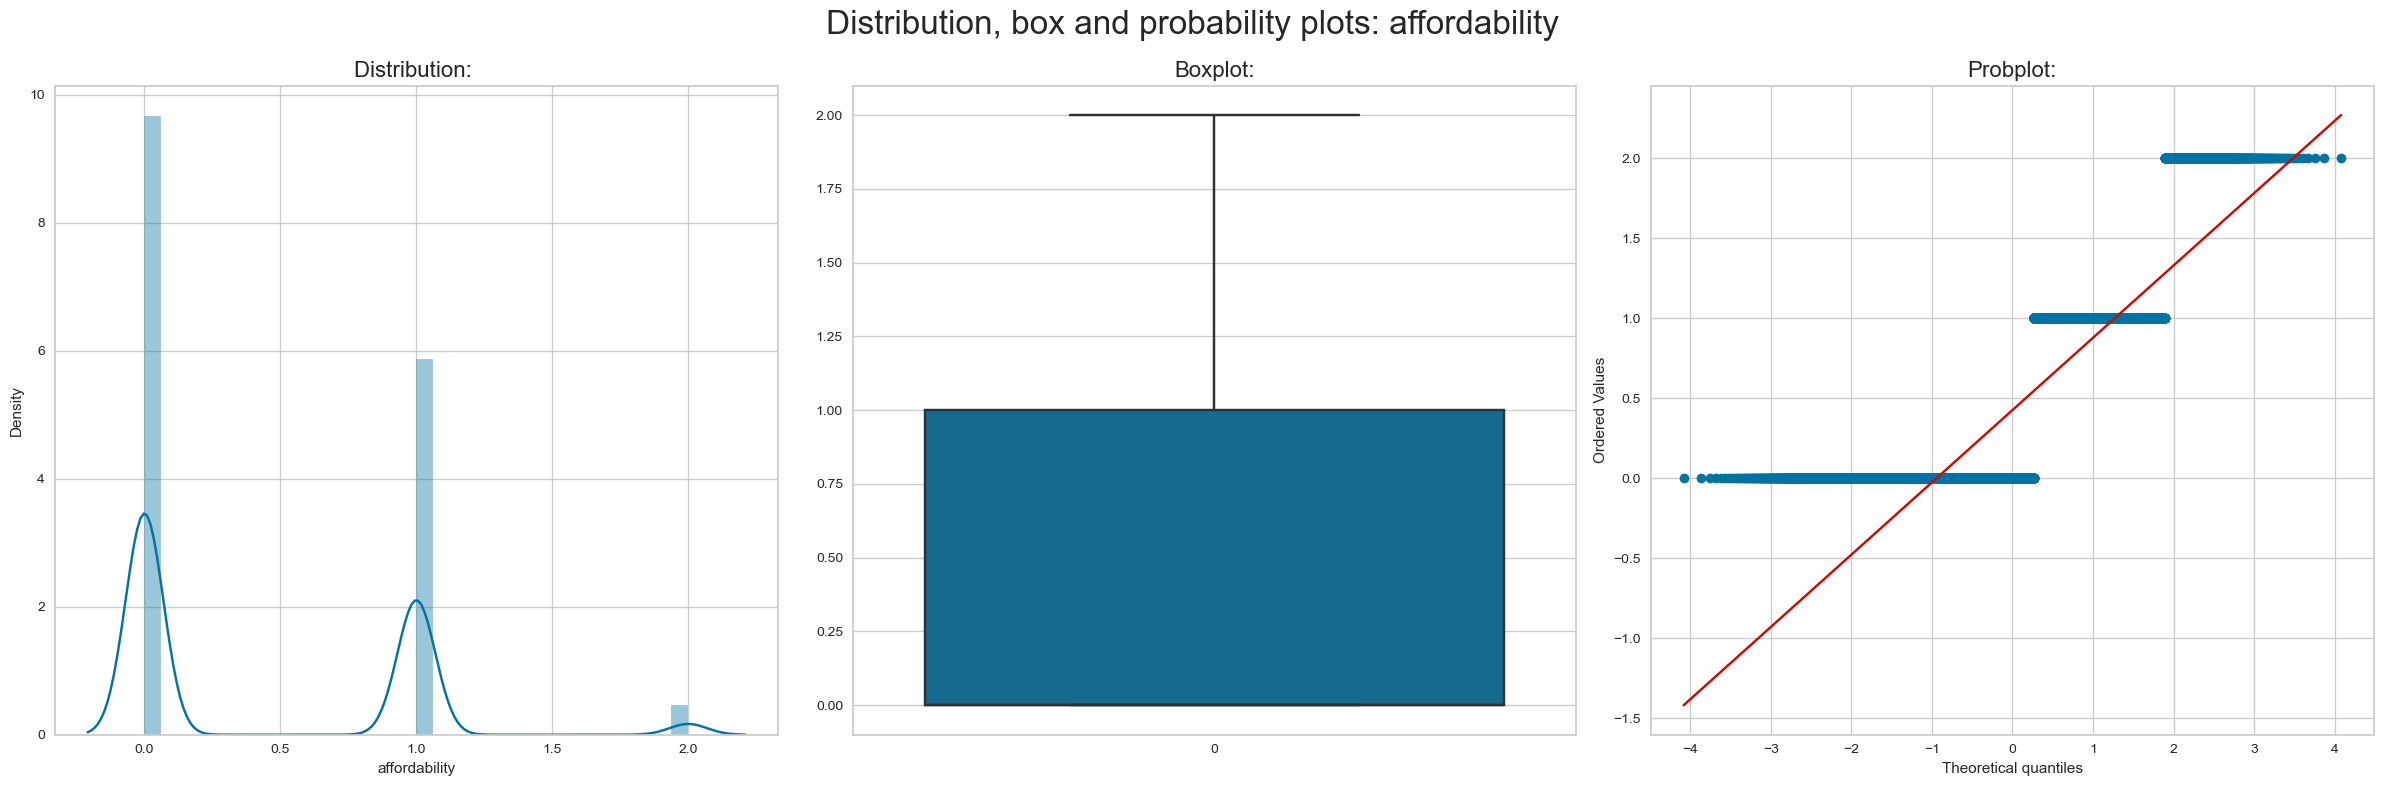

In [98]:
for col in cols:
    check_cols(col,new_df)

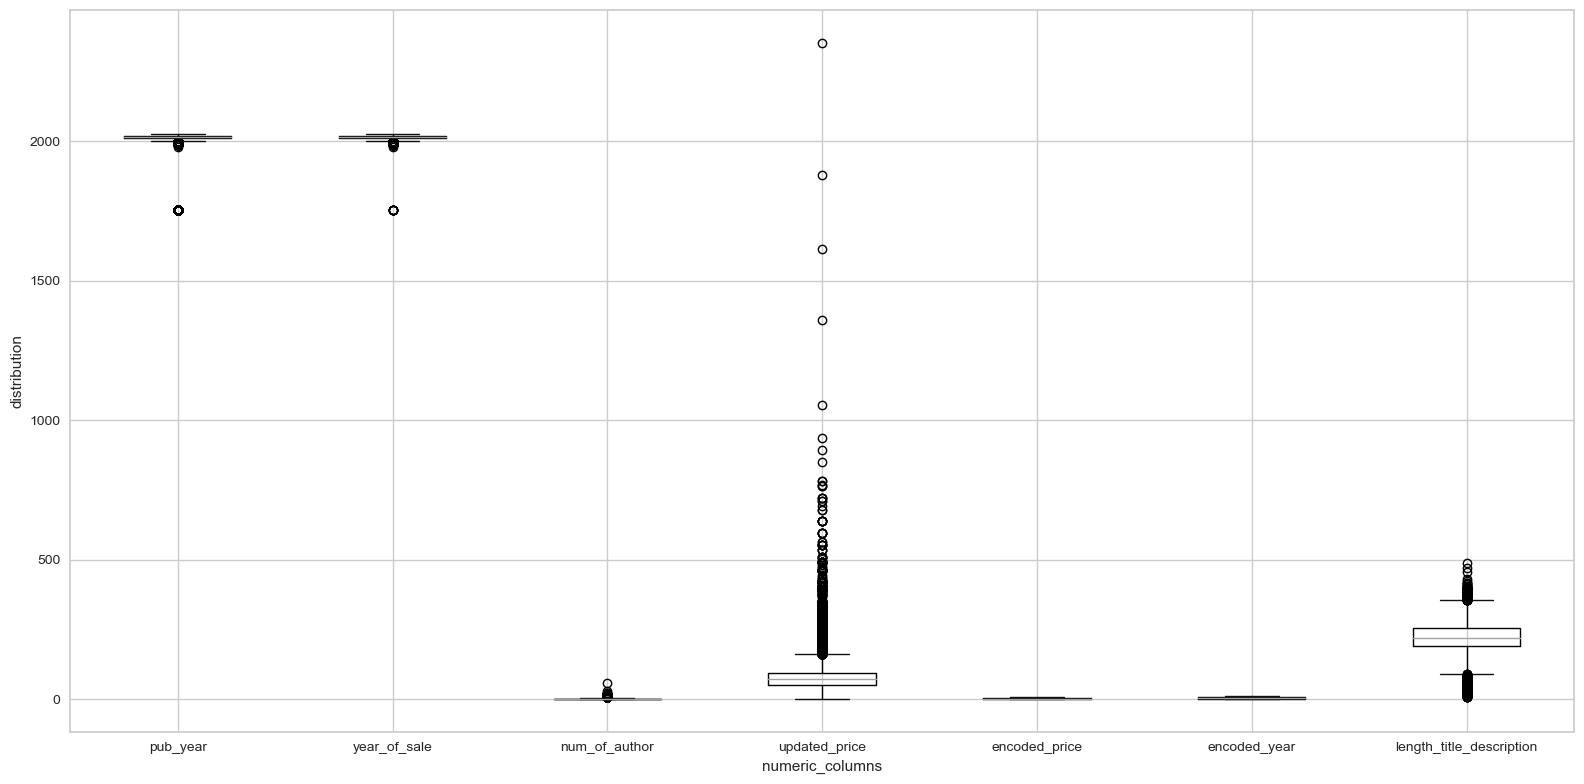

In [100]:
plt.figure(figsize=(16,8))

df_5[df_5_num].boxplot()
plt.xlabel("numeric_columns")
plt.ylabel("distribution")
plt.tight_layout() 
plt.show()

In [101]:
# function to print box plots for each column separately, to use for report
def box_plot(dataframe):
    for col in df_5_num:
        plt.figure(figsize=(6, 8))
        plt.boxplot(dataframe[col].dropna())  
        plt.xlabel('{}'.format(col))
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


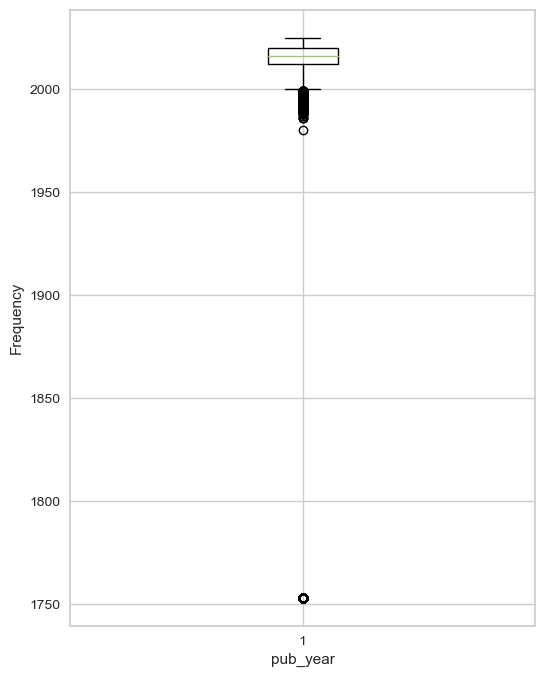

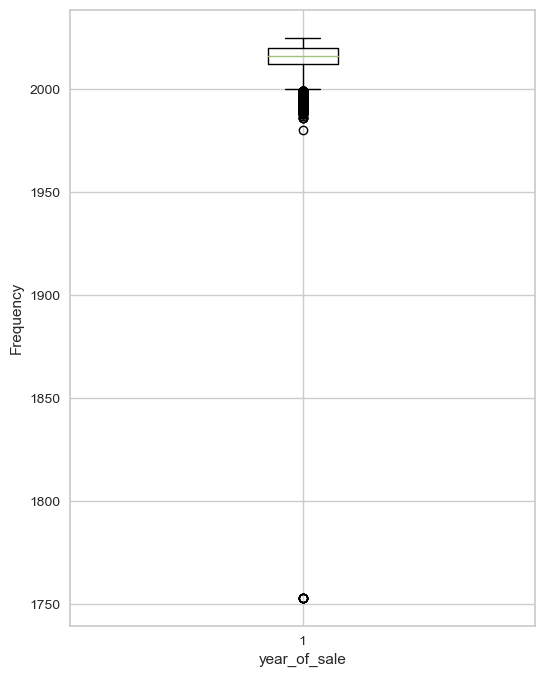

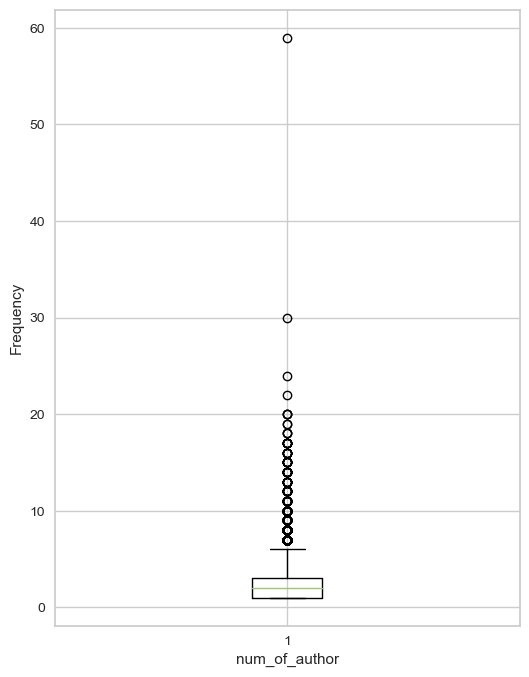

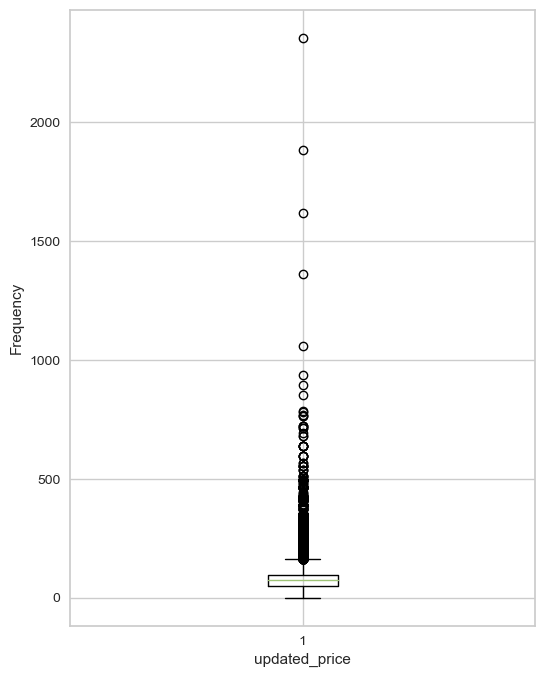

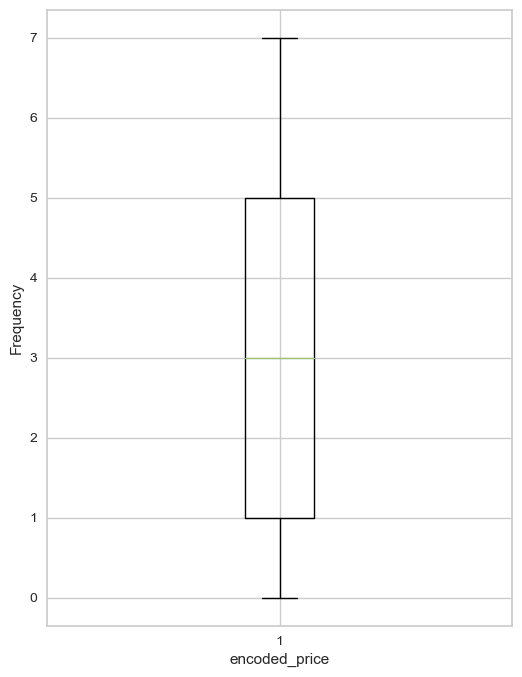

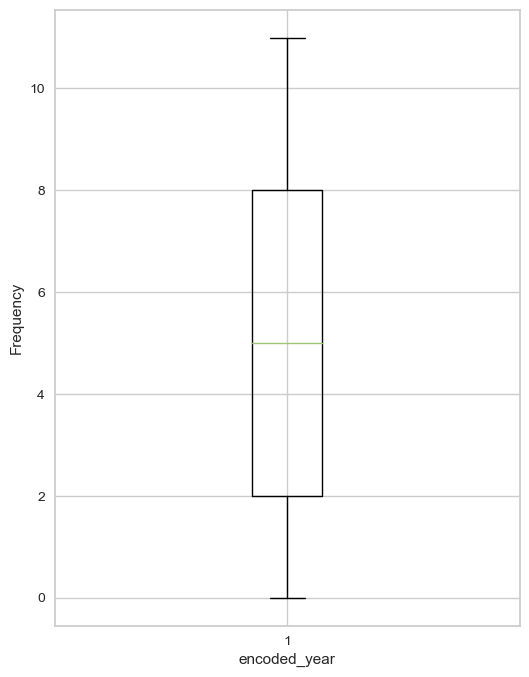

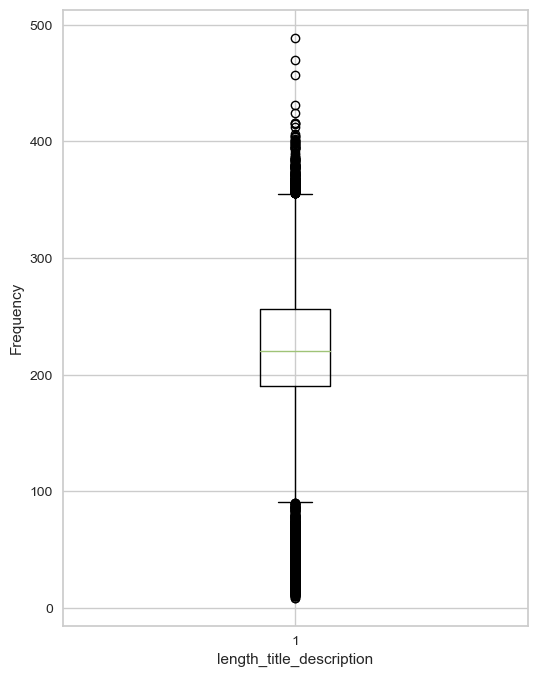

In [102]:
box_plot(df_5)

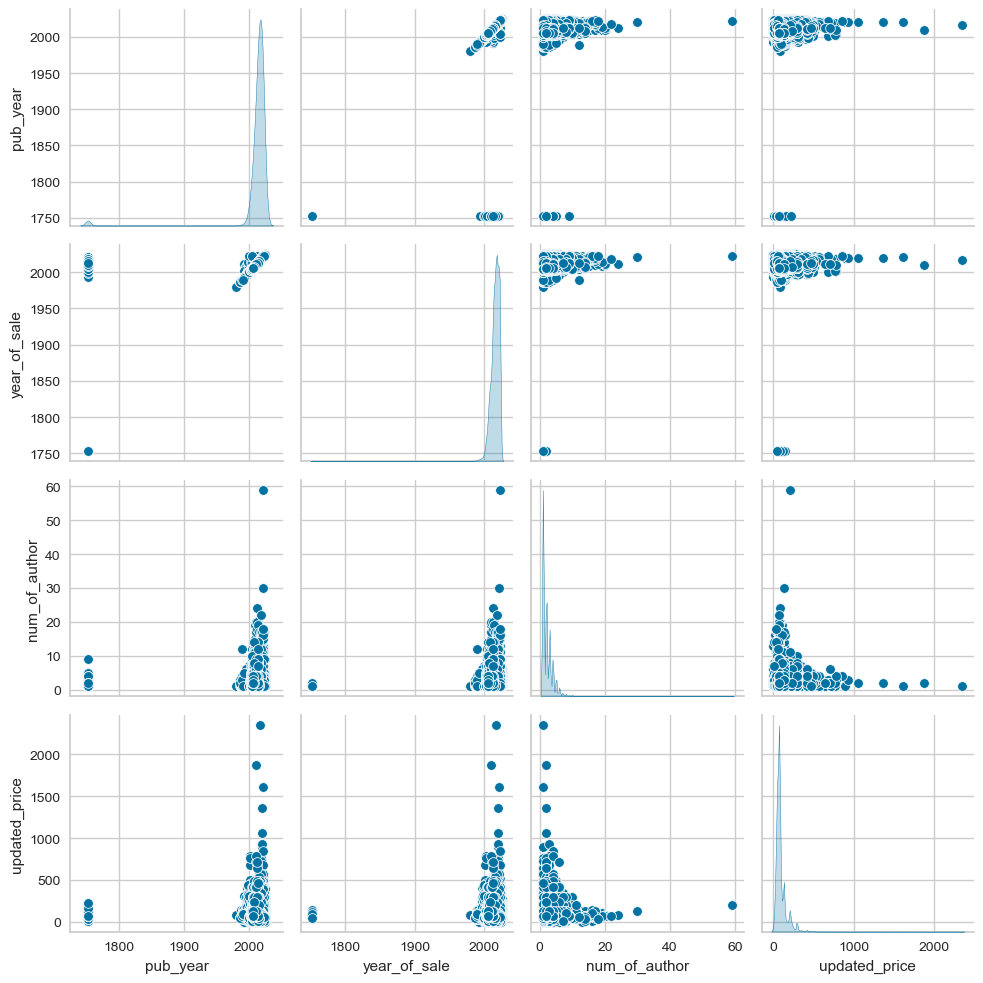

In [103]:
# pair plot of the updated dataframe of only the numerical features
sns.pairplot(df_5[df_5_num[:4]],diag_kind='kde')
plt.tight_layout()
plt.show()

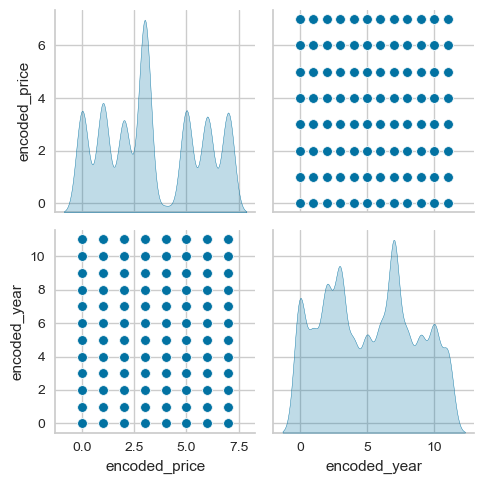

In [104]:
# Pair plots for encoded features
sns.pairplot(df_5[df_5_num[4:6]],diag_kind='kde')
plt.tight_layout()
plt.show()

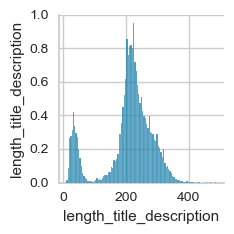

In [105]:
# Distribution of length of title and description
sns.pairplot(df_5[df_5_num[6:]])
plt.tight_layout()
plt.show()

###### The pair plots provide a visual representation of the relationships and distributions among various numerical variables. Notably, both pub_year and year_of_sale show a concentration of data points towards more recent years, with sparse data in earlier years, which is evident from the steep peaks. The num_of_author variable seems to have a limited range with a high concentration of points around lower values, indicative of books typically having fewer authors. The updated_price shows a wide range of values with a clustering towards the lower end, suggesting that most books are priced modestly with a few exceptions at higher prices. The plots for encoded_price and encoded_year indicate that after encoding, these variables exhibit a series of distinct peaks, which could be the result of a categorical encoding process that translates different categories into discrete numeric levels. These insights could be valuable for understanding the distributions of each variable and the relationships between them, which might inform pricing strategies, market segmentation, or inventory decisions.



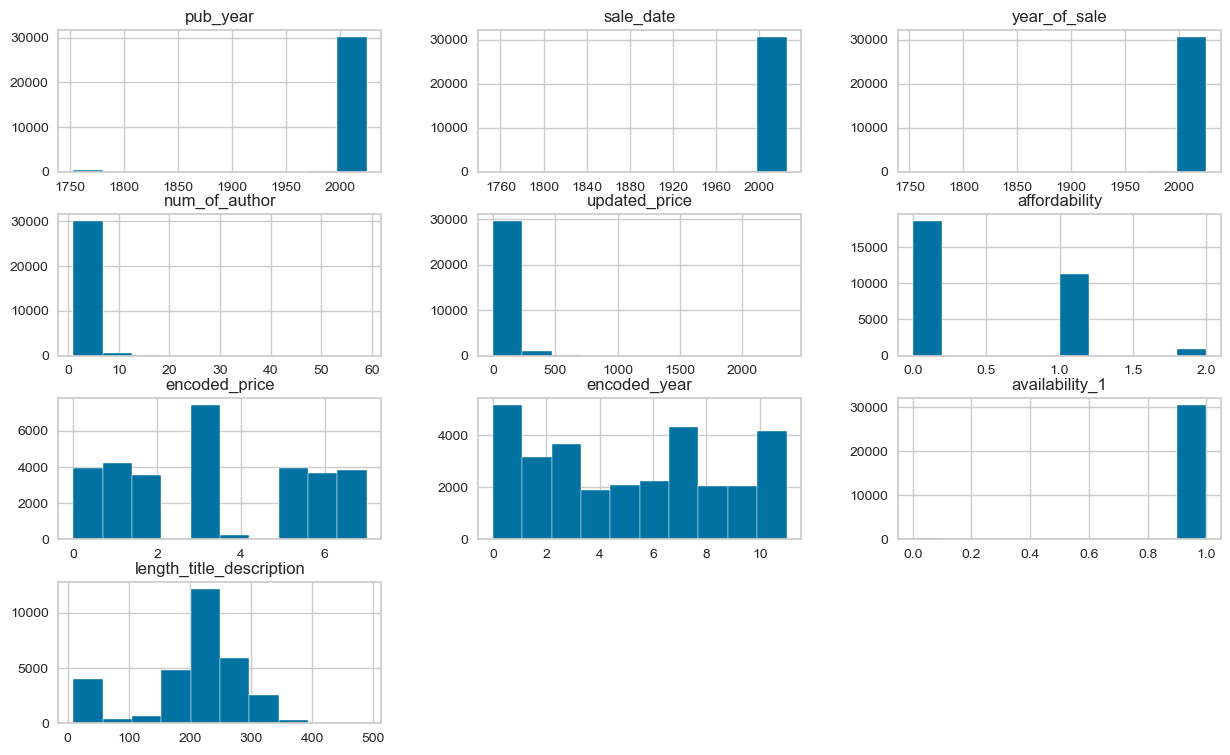

In [106]:
# Histogram of the dataframe (updated)
df_5.hist(figsize=(15,9),bins=10)
plt.show()

###### The histograms depict the frequency distributions of various book-related variables. The 'pub_year' and 'year_of_sale' histograms skew towards more recent years, with a noticeable spike in contemporary times. The 'num_of_author' histogram indicates most books are authored by a small number of individuals, with single-author works being the most common. Prices (updated_price) tend to cluster in the lower range, suggesting a higher volume of books with affordable pricing. The 'encoded_price' shows a multi-modal distribution, hinting at distinct price categories, while 'encoded_year' displays several peaks, possibly reflecting groupings within the data. The availability histogram shows a binary distribution, which could represent a categorical variable such as in-stock or out-of-stock status. Finally, the 'length_title_description' variable shows a varied distribution with a right skew, implying that while most books have shorter titles and descriptions, a few have much longer ones.

# Step 7: Handling_outliers 

## Flooring and Capping Method


**Description of the variables and functions used under this section**

'__df_6__': copy of df_5 (main dataframe with updated features), used for application of Flooring and Capping method

'__fol_cap(dataframe)__' : Function used to handle outliers using flooring and capping strategy



In [107]:
df_6 = df_5.copy()

In [108]:
def fol_cap(dataframe):
#     print(dataframe)
    for col in df_5_num:
        print(col) # optional
        dataframe[col]=np.where(dataframe[col]<out[col]['Lower_whisker'],out[col]['Lower_whisker'],dataframe[col])
        dataframe[col]=np.where(dataframe[col]>out[col]['upper_whisker'],out[col]['upper_whisker'],dataframe[col])

In [109]:
fol_cap(df_6)

pub_year
year_of_sale
num_of_author
updated_price
encoded_price
encoded_year
length_title_description


## Distribution check of columns after using Floor and cap method of outlier handling

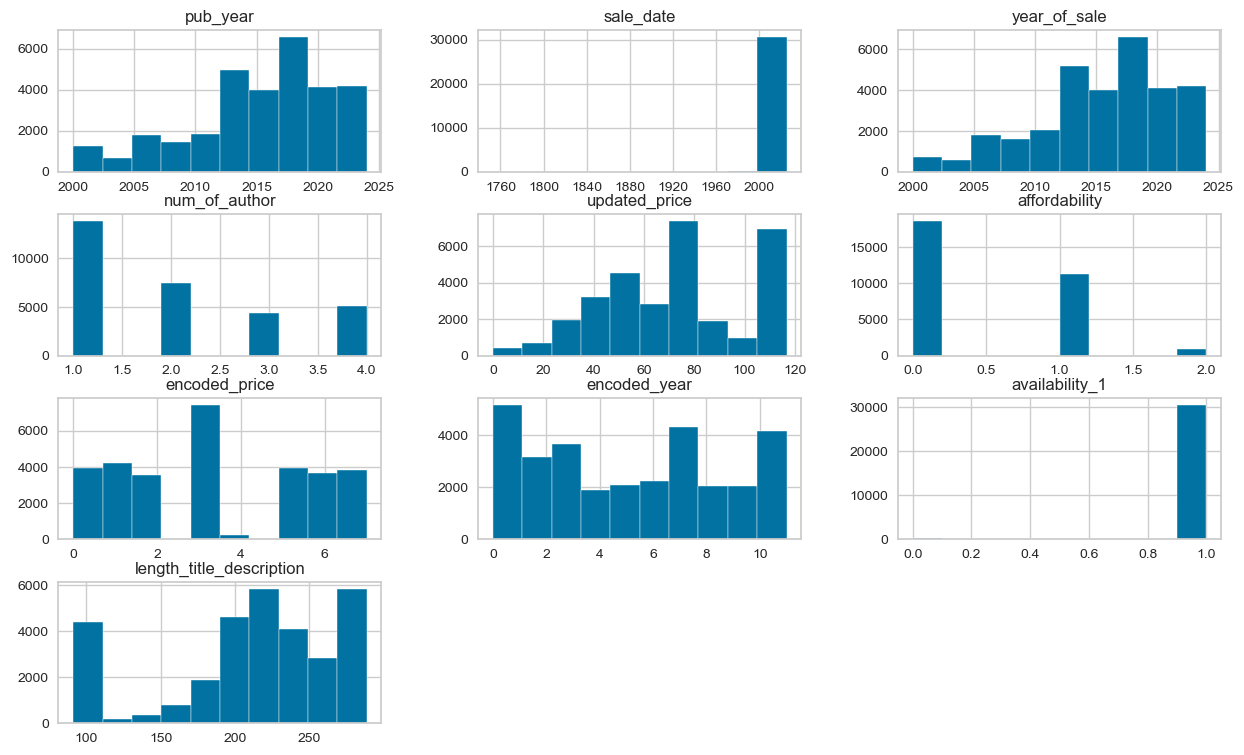

In [110]:
df_6.hist(figsize=(15,9),bins=10)
plt.show()

## Box plot comparision of features after using Floor and cap method

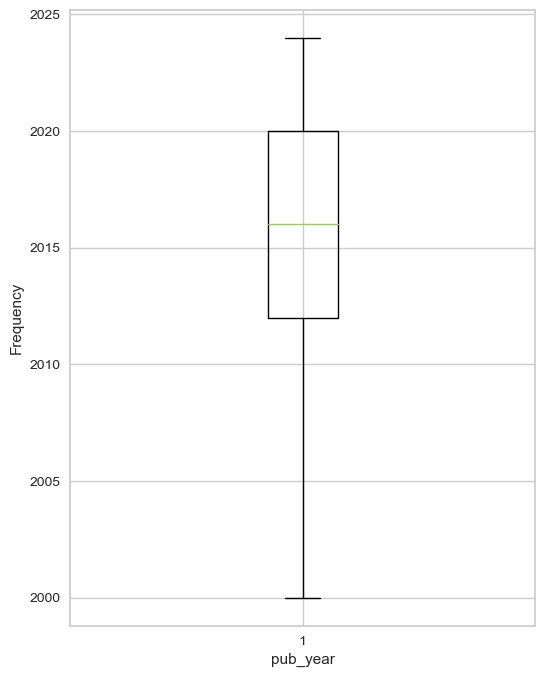

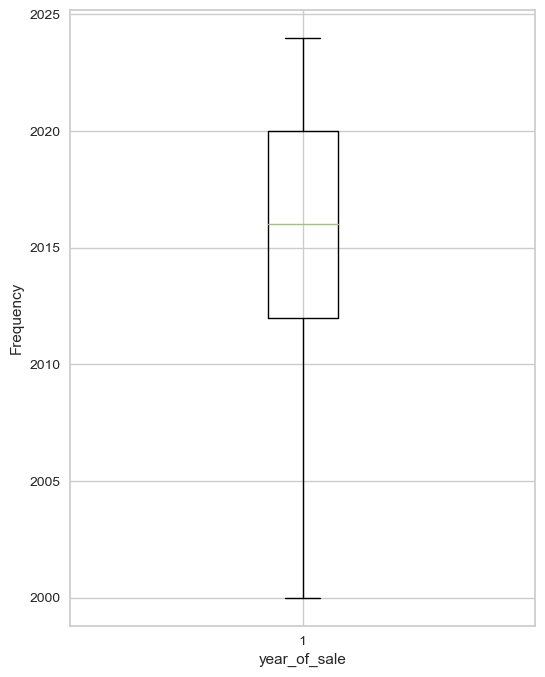

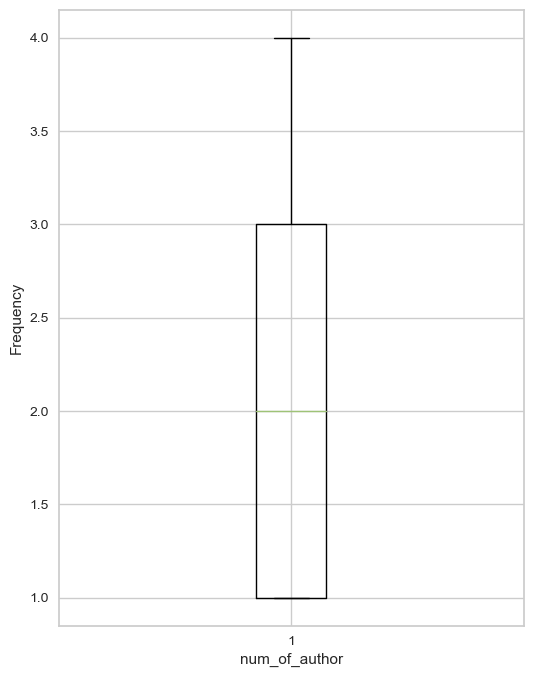

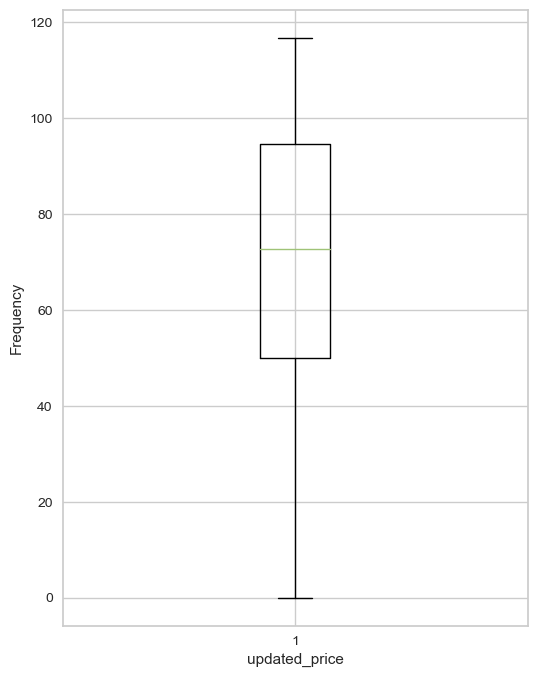

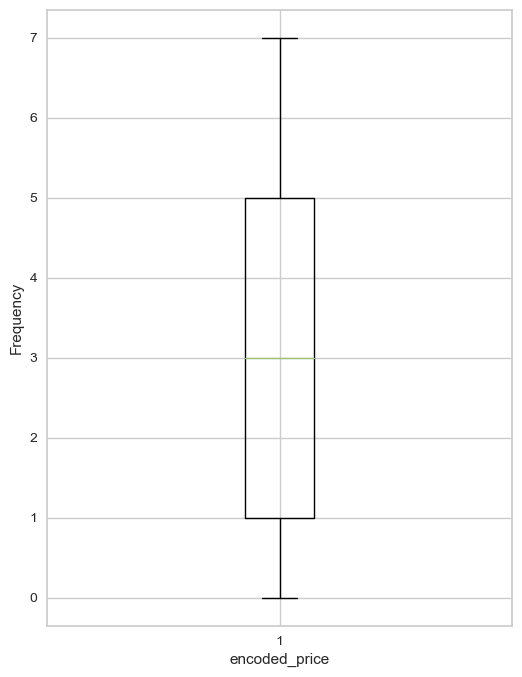

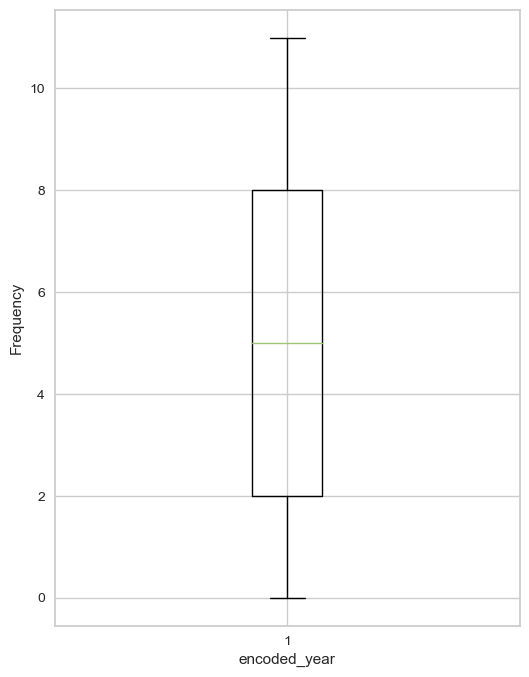

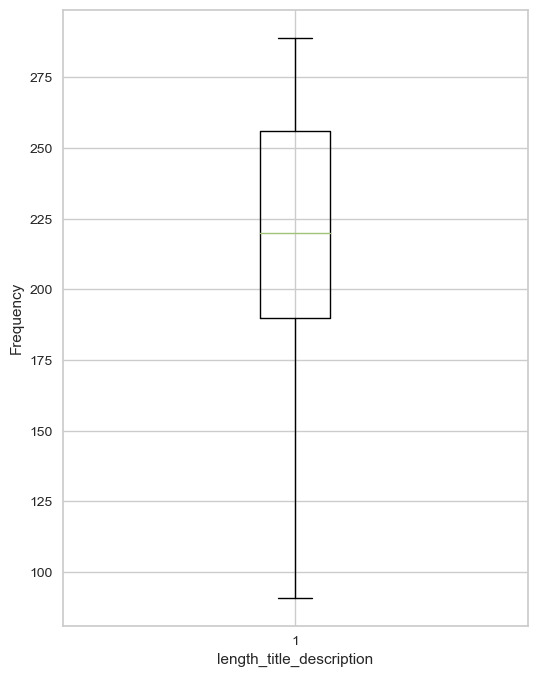

In [111]:
box_plot(df_6)

## Evaluation of skewness and Kurtosis after using Floor and Cap method

In [112]:
print(get_skew(df_6))
print("="*50+'\n')
print(get_kurtosis(df_6))

pub_year                   -0.782460
year_of_sale               -0.684993
num_of_author               0.659085
updated_price               0.095980
encoded_price               0.164453
encoded_year                0.074813
length_title_description   -0.773126
dtype: float64

pub_year                    0.007597
year_of_sale               -0.094856
num_of_author              -0.998686
updated_price              -0.834049
encoded_price              -1.219940
encoded_year               -1.176322
length_title_description   -0.248143
dtype: float64


# Trimming 

In this section, we ended up using the trimming strategy on each feature individually for having optimal results.


**Description of the variables and functions used under this section**

'__df_7__': copy of df_5 (main dataframe with updated features), used for application of Trimming method

In [113]:
df_7 = df_5.copy()

In [114]:
# shape of the dataframe before trimming
df_7.shape

(30828, 16)

In [115]:
# trimming out 'pub_year' 
df_7 = df_7[(df_7.pub_year>out['pub_year']['Lower_whisker']) & (df_7.pub_year<out['pub_year']['upper_whisker'])]

In [116]:
df_7.shape

(29625, 16)

In [117]:
# trimming out 'num_of_authors' 
df_7=df_7[(df_7.num_of_author>out['num_of_author']['Lower_whisker']) & (df_7.num_of_author<out['num_of_author']['upper_whisker'])]

In [118]:
df_7.shape

(24613, 16)

In [119]:
# trimming out 'updated_price' 
df_7=df_7[(df_7.updated_price>out['updated_price']['Lower_whisker']) & (df_7.updated_price<out['updated_price']['upper_whisker'])]

In [120]:
df_7.shape

(20422, 16)

In [121]:
# trimming out 'length_title_description' 
df_7=df_7[(df_7.length_title_description>out['length_title_description']['Lower_whisker']) & (df_7.length_title_description<out['length_title_description']['upper_whisker'])]

In [122]:
df_7.shape

(14001, 16)

In [123]:
#we didn't use the  'encoded_price', 'encoded_year' as it is already trimmed properly
#16913 data is trimmed with 54%

## Distribution check of columns after using TRIM method of outlier handling

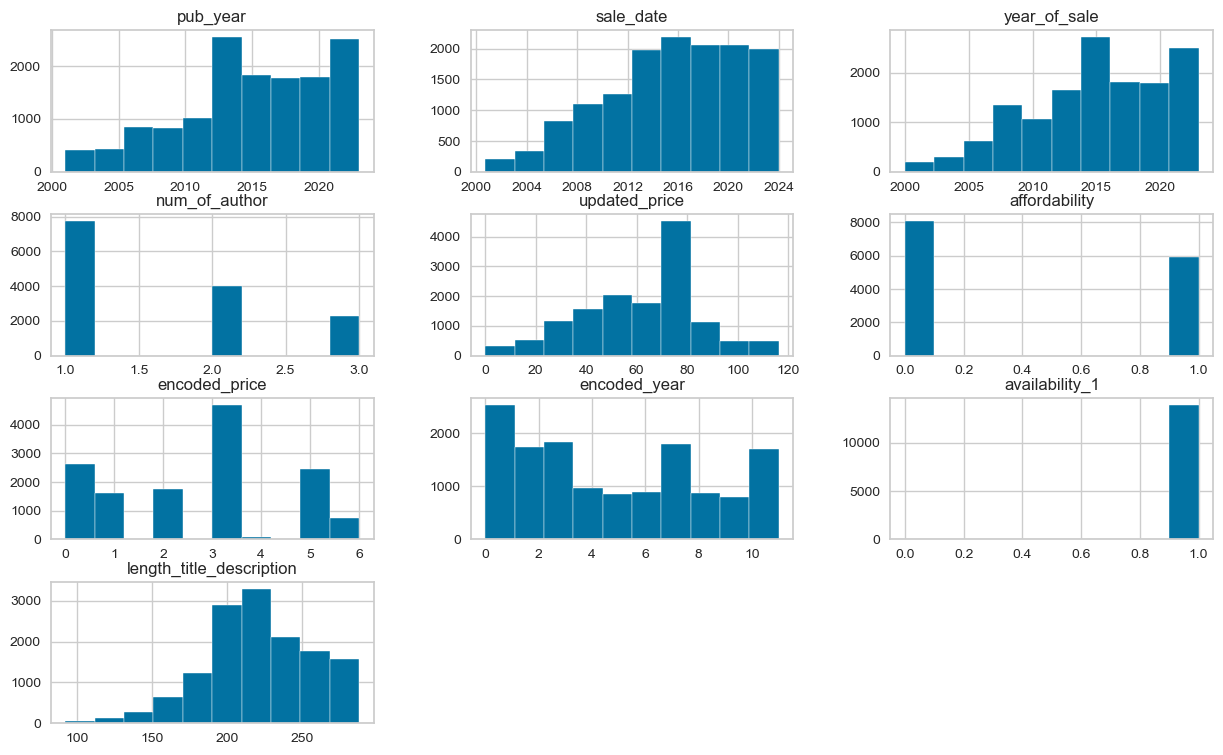

In [124]:
# after trimming
df_7.hist(figsize=(15,9),bins=10)
# plt.figure(figsize=(15,8))
plt.show()

## Box plot of columns after using TRIM method of outlier handling

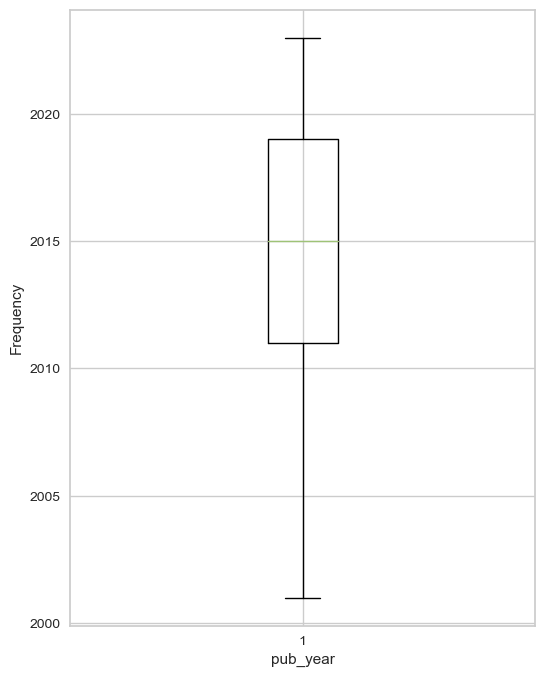

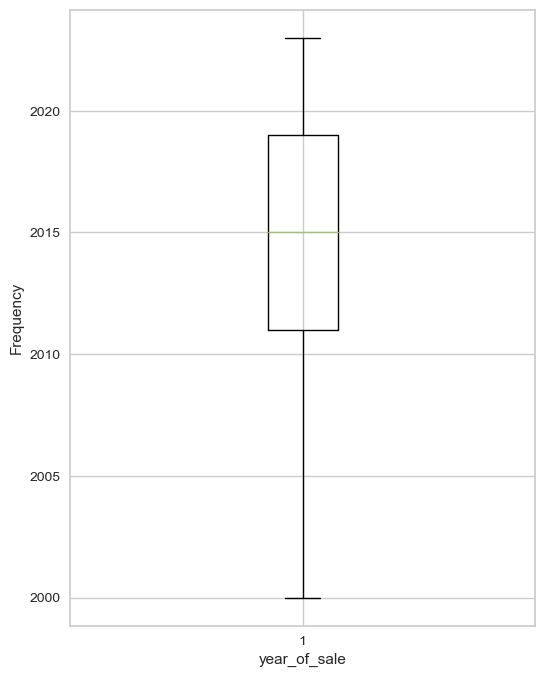

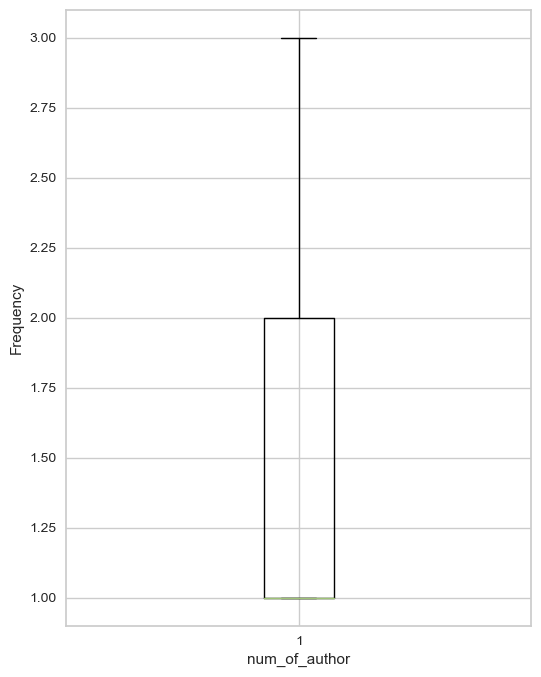

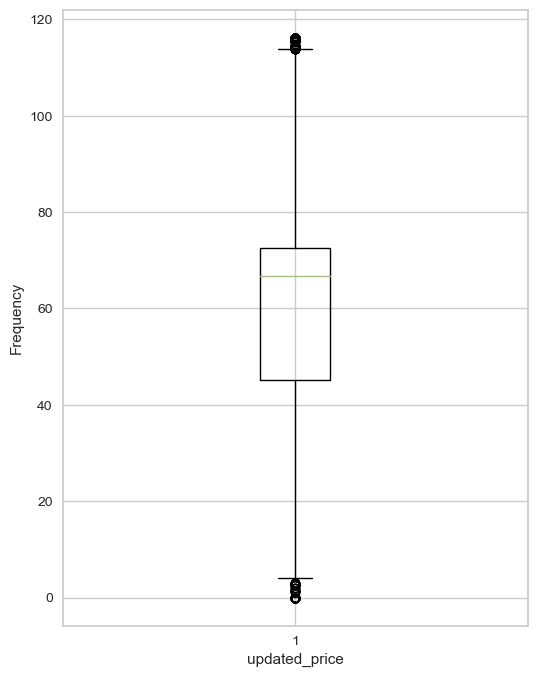

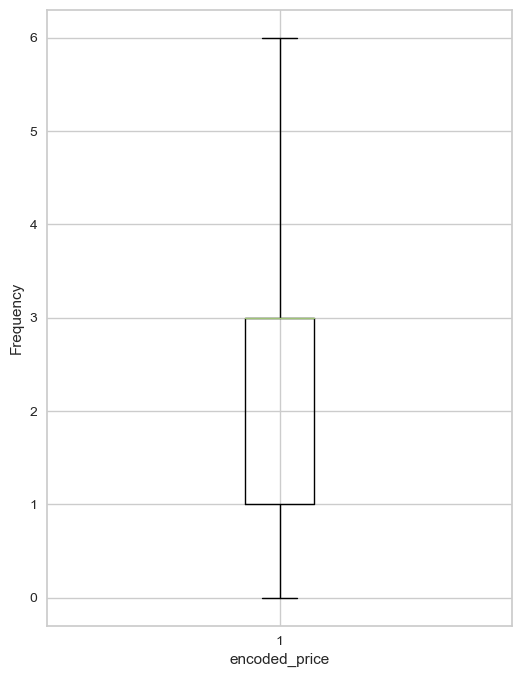

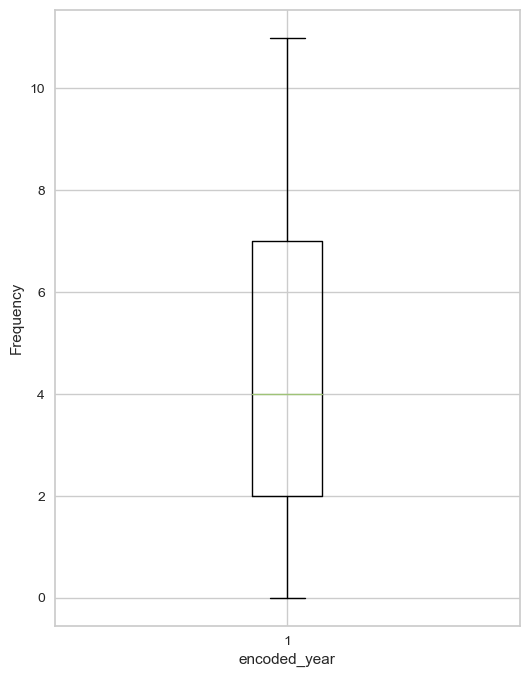

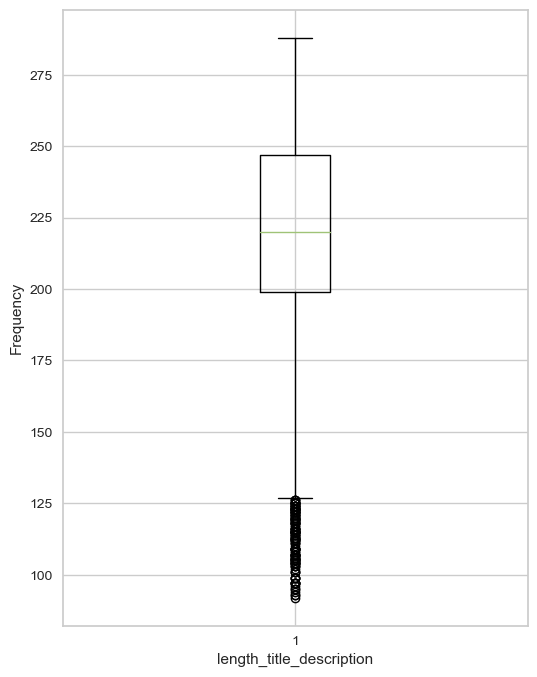

In [125]:
box_plot(df_7)

## Evaluation of skewness and Kurtosis after using Trim method

In [126]:
print(get_skew(df_7))
print("="*50+'\n')
print(get_kurtosis(df_6))

pub_year                   -0.478955
year_of_sale               -0.447083
num_of_author               0.781693
updated_price              -0.270124
encoded_price               0.133706
encoded_year                0.227116
length_title_description   -0.290060
dtype: float64

pub_year                    0.007597
year_of_sale               -0.094856
num_of_author              -0.998686
updated_price              -0.834049
encoded_price              -1.219940
encoded_year               -1.176322
length_title_description   -0.248143
dtype: float64


# Logarithmic Transformation for outlier handling


**Description of the variables and functions used under this section**

'__df_8__': copy of df_5 (main dataframe with updated features), used for application of Logarithmic transformation method

'__log_(dataframe)__' : Function used to handle outliers using log transformation strategy



In [127]:
df_8 = df_5.copy()

In [128]:
# description of the dataset before log transformation
df_8.describe()

,pub_year,year_of_sale,num_of_author,updated_price,affordability,encoded_price,encoded_year,availability_1,length_title_description
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,2011.657325,2015.326943,2.219476,87.497879,0.425684,3.352504,5.180161,0.992053,207.098579
std,31.568664,7.026616,1.715774,69.133299,0.550518,2.297400,3.368124,0.088794,80.955214
min,1753.000000,1753.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,2012.000000,2012.000000,1.000000,49.990000,0.000000,1.000000,2.000000,1.000000,190.000000
50%,2016.000000,2016.000000,2.000000,72.640000,0.000000,3.000000,5.000000,1.000000,220.000000
75%,2020.000000,2020.000000,3.000000,94.440000,1.000000,5.000000,8.000000,1.000000,256.000000
max,2025.000000,2025.000000,59.000000,2353.370000,2.000000,7.000000,11.000000,1.000000,489.000000


In [129]:
# main function for log transformation
def log_(dataframe):
    for col in df_5_num:
        dataframe[col] = dataframe[col].map(lambda i: np.log(i) if i>0 else 0)


In [130]:
log_(df_8)

In [131]:
# description of the dataset after log transformation
df_8.describe()

,pub_year,year_of_sale,num_of_author,updated_price,affordability,encoded_price,encoded_year,availability_1,length_title_description
count,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000,30828.000000
mean,7.606580,7.608530,0.589006,4.253041,0.425684,1.018482,1.401758,0.992053,5.173174
std,0.016747,0.003581,0.613654,0.683522,0.550518,0.715690,0.800651,0.088794,0.699479
min,7.469084,7.469084,0.000000,-0.010050,0.000000,0.000000,0.000000,0.000000,2.197225
25%,7.606885,7.606885,0.000000,3.911823,0.000000,0.000000,0.693147,1.000000,5.247024
50%,7.608871,7.608871,0.693147,4.285516,0.000000,1.098612,1.609438,1.000000,5.393628
75%,7.610853,7.610853,1.098612,4.547965,1.000000,1.609438,2.079442,1.000000,5.545177
max,7.613325,7.613325,4.077537,7.763604,2.000000,1.945910,2.397895,1.000000,6.192362


## Distribution check of columns after using Log method of outlier handling

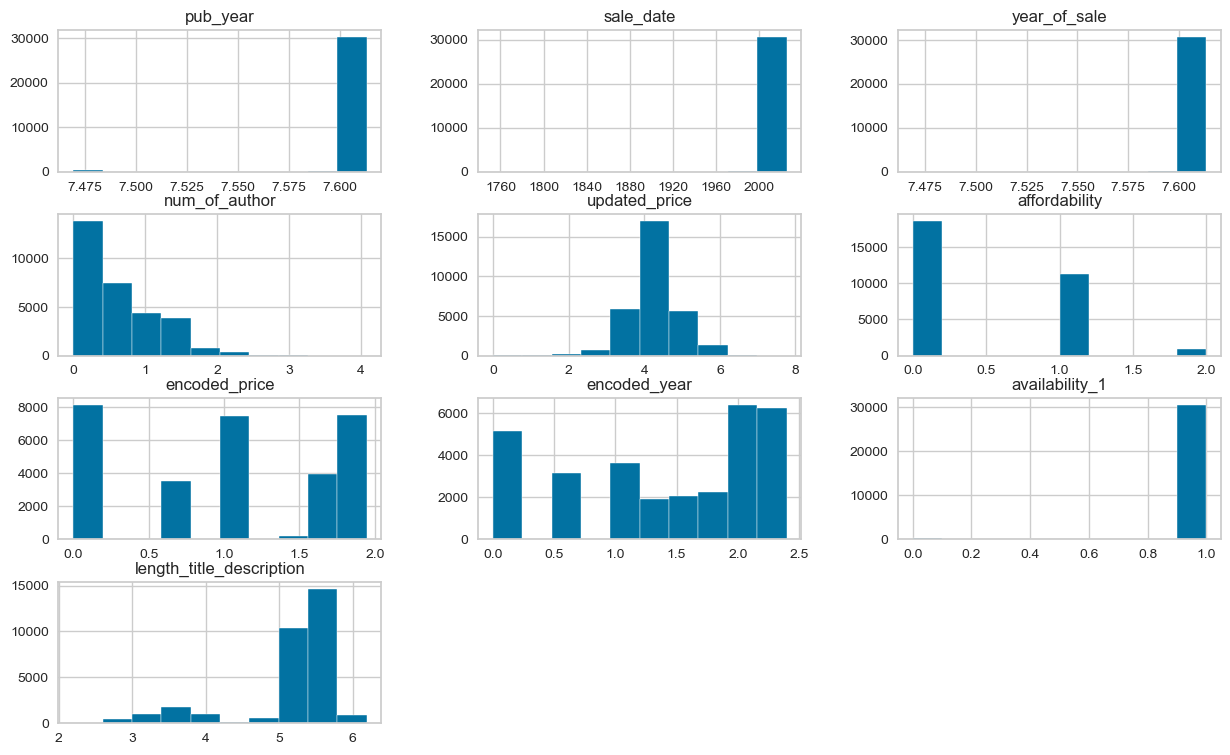

In [132]:
df_8.hist(figsize=(15,9),bins=10)
# plt.figure(figsize=(15,8))
plt.show()

## Box Plots of columns after using Log method of outlier handling

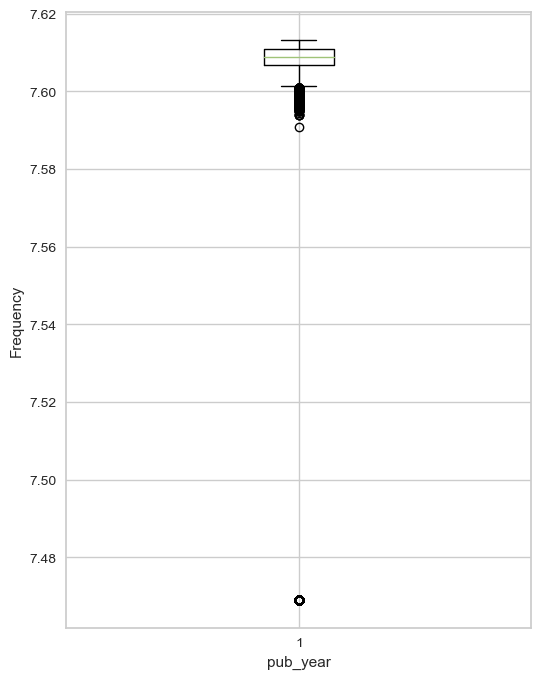

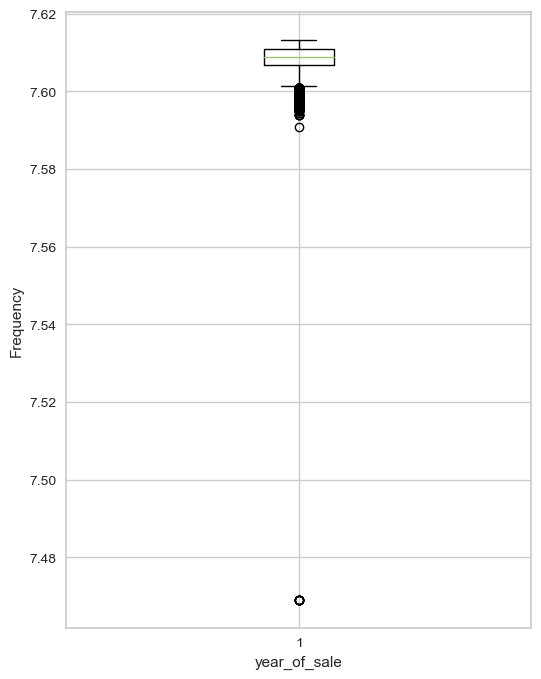

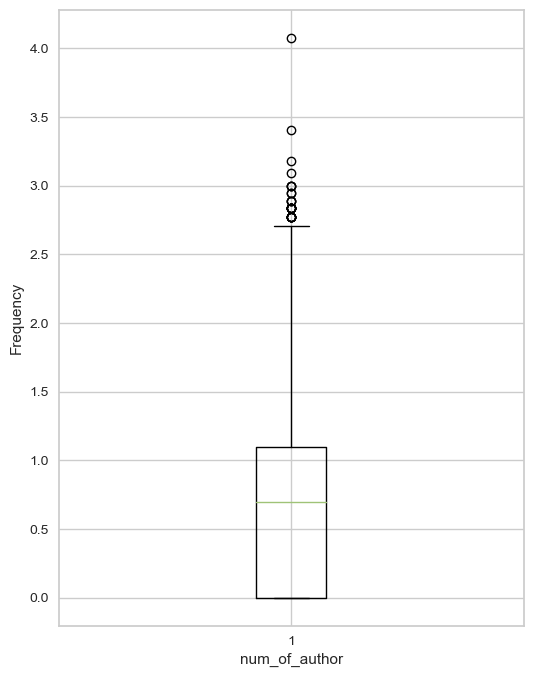

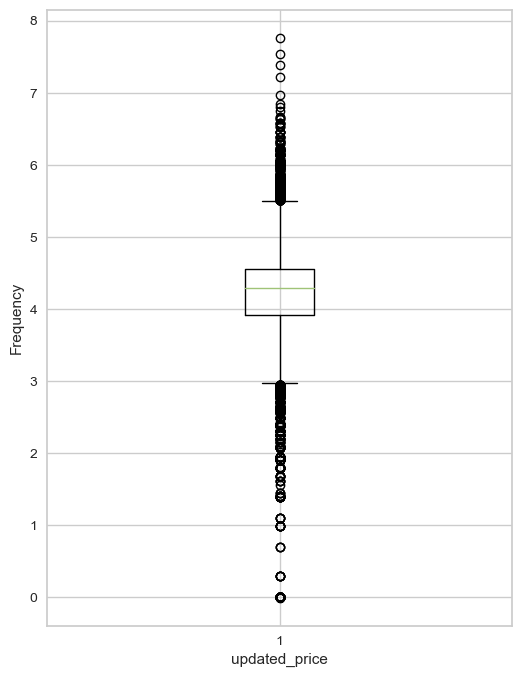

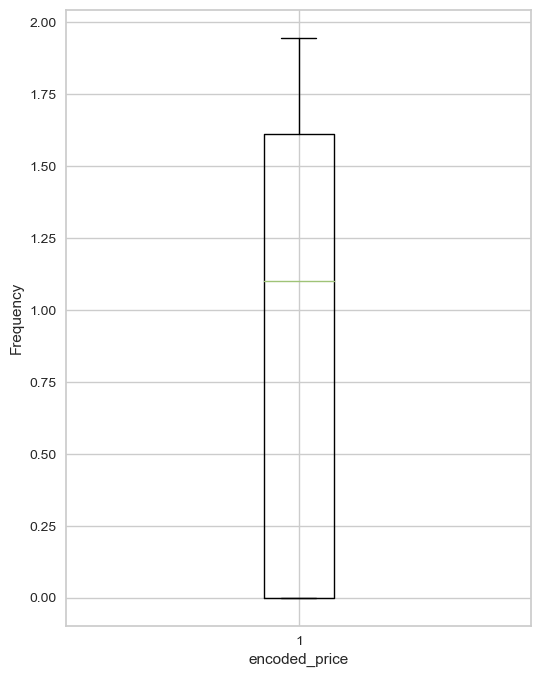

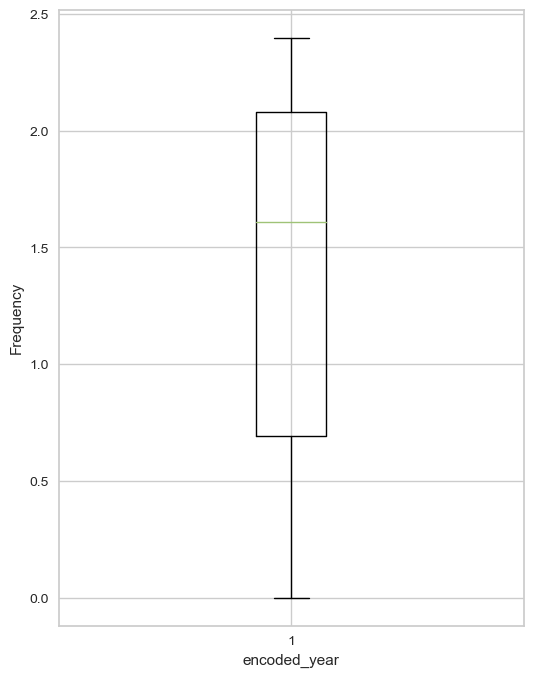

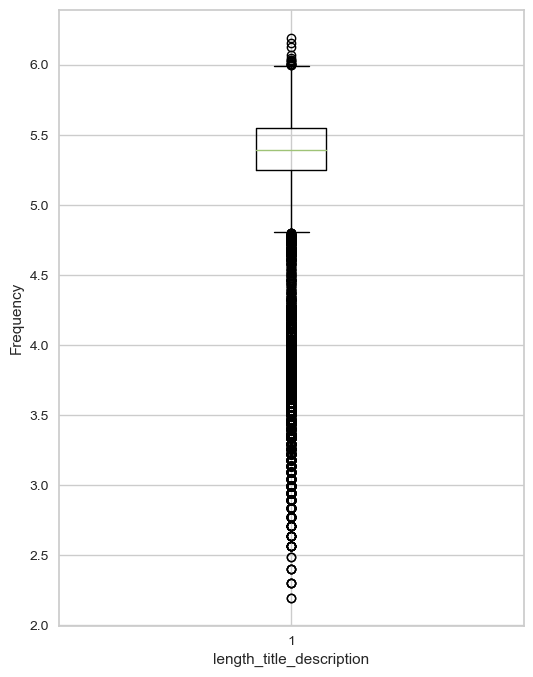

In [133]:
box_plot(df_8)

## Evaluation of skewness and Kurtosis after using Log method

In [134]:
print(get_skew(df_8))
print("="*50+'\n')
print(get_kurtosis(df_6))

pub_year                    -7.856923
year_of_sale               -15.726050
num_of_author                0.620608
updated_price               -0.898021
encoded_price               -0.275110
encoded_year                -0.595447
length_title_description    -1.956265
dtype: float64

pub_year                    0.007597
year_of_sale               -0.094856
num_of_author              -0.998686
updated_price              -0.834049
encoded_price              -1.219940
encoded_year               -1.176322
length_title_description   -0.248143
dtype: float64


In [135]:
df_5['key'] = df_5['key_words'].apply(lambda x: ' '.join(x))

In [136]:
df_5.head()

,publisher,pub_year,sale_date,year_of_sale,num_of_author,processed_title,processed_description,updated_price,edition,affordability,encoded_price,encoded_year,availability_1,key_words,common_word,length_title_description,key
0,O'Reilly Media,2024,2024-01-10,2024,1,learning go,go rapidly become preferred language building ...,71.99,2,0,3,11,1,"[go, rapidly, become, preferred, language, bui...","[go, language, tutorial, teach, developer, rap...",256,go rapidly become preferred language building ...
1,O'Reilly Media,2023,2023-10-17,2023,1,tidy first,tidying messy software means breaking code mak...,42.99,NaN,1,1,11,1,"[tidying, messy, software, mean, breaking, cod...","[software, code, make, tidying, messy, mean, b...",247,tidying messy software mean breaking code make...
2,O'Reilly Media,2022,2022-10-04,2022,1,hands on machine learning with scikit learn ke...,recent series breakthroughs deep learning boos...,96.99,3,0,6,10,1,"[recent, series, breakthrough, deep, learning,...","[learning, recent, series, breakthrough, deep,...",330,recent series breakthrough deep learning boost...
3,O'Reilly Media,2017,2017-03-16,2017,1,designing data intensive applications,data center many challenges system design toda...,67.99,NaN,0,3,6,1,"[data, center, many, challenge, system, design...","[data, center, many, challenge, system, design...",301,data center many challenge system design today...
4,Pearson Education,2023,2023-10-18,2023,1,exam ref ms microsoft administrator,prepare microsoft exam ms help demonstrate rea...,53.86,NaN,1,2,11,1,"[prepare, microsoft, exam, m, help, demonstrat...","[microsoft, prepare, exam, m, help, demonstrat...",220,prepare microsoft exam m help demonstrate real...


## Clustering based on Price and Publication year

In [137]:
# Handle missing values in 'price' by filling with the mean
df_5['updated_price'].fillna(df_5['updated_price'].mean(), inplace=True)

In [138]:
# Fill missing 'pub_year' values with the mode (most common value)
pub_year_mode = df['pub_year'].mode()[0]  # Get the most common publication year
df_5['pub_year'].fillna(pub_year_mode, inplace=True)

In [139]:
# Select 'price' and 'pub_year' for clustering
df_cluster = df_5[['updated_price', 'pub_year']]

In [140]:
# Scale the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [141]:
# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

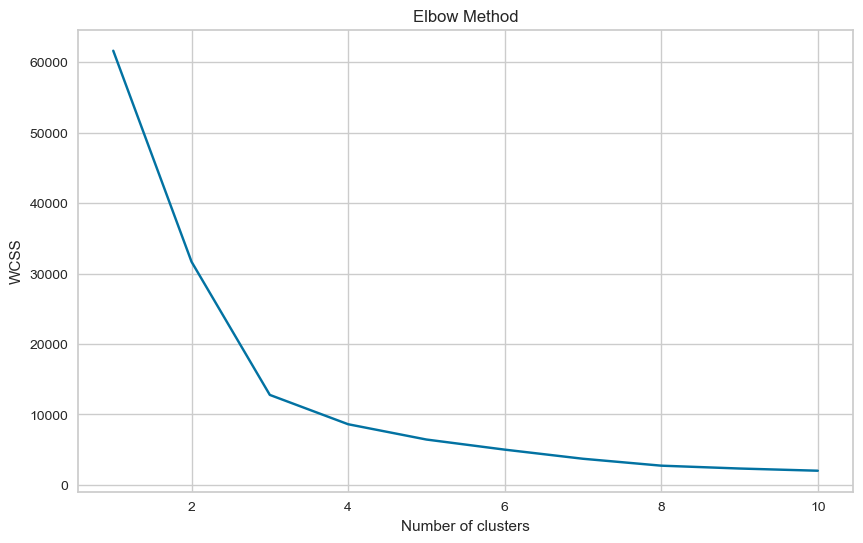

In [142]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [143]:
optimal_clusters = 3 

# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(df_cluster_scaled)

In [144]:
# Silhouette Score for KMeans
silhouette_avg = silhouette_score(df_cluster_scaled, kmeans_clusters)
print(f'Silhouette Score for K-Means with {optimal_clusters} clusters:', silhouette_avg)

Silhouette Score for K-Means with 3 clusters: 0.7382138560948529


In [145]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_cluster_scaled)

In [146]:
# Add the cluster labels to the original DataFrame
df_5['kmeans_cluster'] = kmeans_clusters
df_5['dbscan_cluster'] = dbscan_clusters

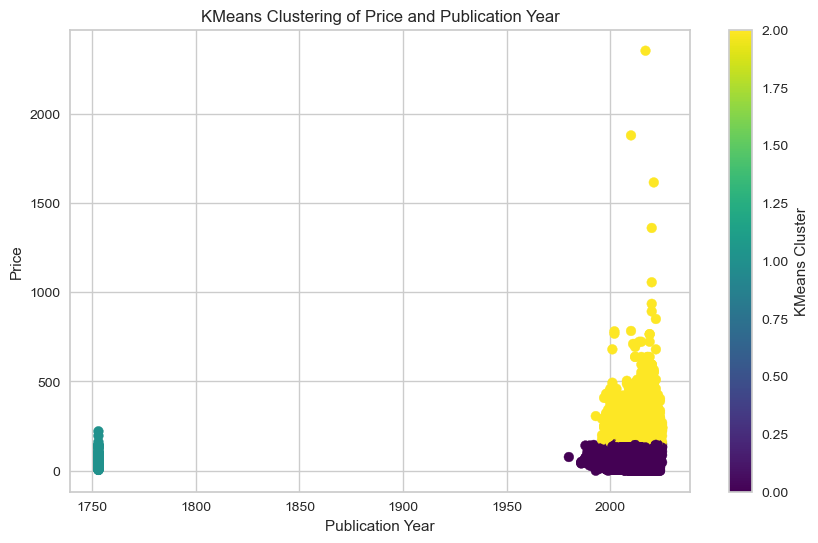

In [147]:
# Optional visualization
# KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_5['pub_year'], df_5['updated_price'], c=df_5['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering of Price and Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Price')
plt.colorbar(label='KMeans Cluster')
plt.show()

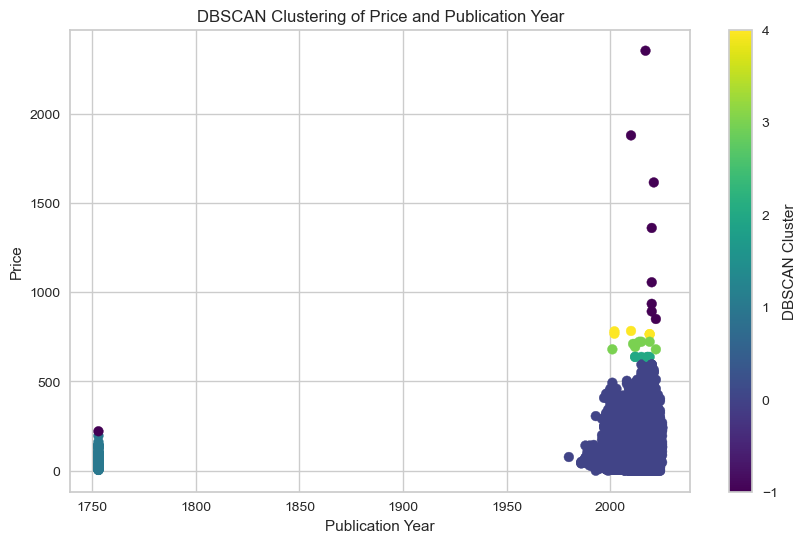

In [148]:
# DBSCAN Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_5['pub_year'], df_5['updated_price'], c=df_5['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Price and Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Price')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

###### The clustering visualization suggests that there has been a tendency for book prices to increase over time and that there are distinct groups or categories of books that can be identified based on price and publication year, with some books standing out as exceptions to the general pricing trends.

## Clustering based on Book Edition number and Price

In [149]:
df_5[['edition','updated_price']].shape

(30828, 2)

In [150]:
edition_mode = df['edition'].mode()[0]  # Get the most common publication year
df_5['edition'].fillna(edition_mode, inplace=True)

updated_price_mode = df['updated_price'].mode()[0]  # Get the most common publication year
df_5['updated_price'].fillna(edition_mode, inplace=True)

In [151]:
# Select 'edition_num' and 'price' for clustering, dropping any missing values
# df_5.dropna(subset=['edition', 'updated_price'], inplace=True)

In [152]:
df_5[['edition','updated_price']].shape

(30828, 2)

In [153]:
# Scale the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [154]:
# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

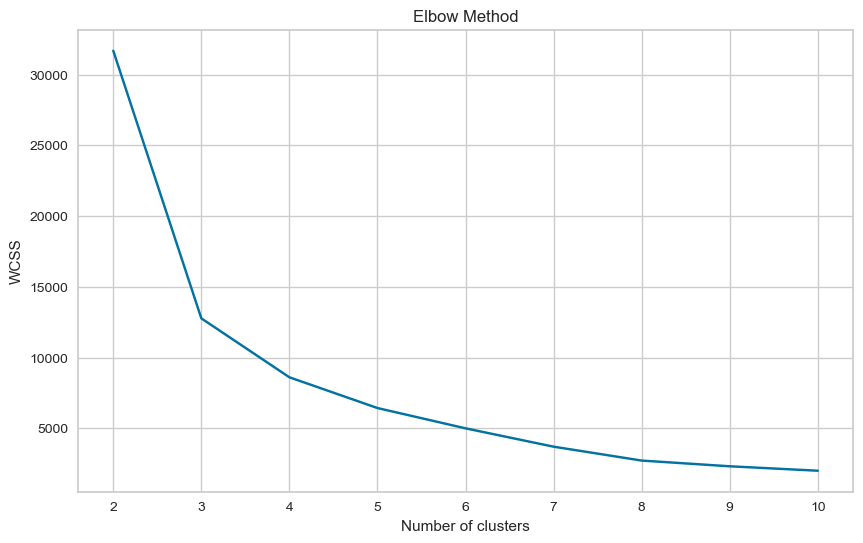

In [155]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
optimal_clusters = 3 

In [157]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_cluster_scaled)

In [158]:
# Add cluster labels to the DataFrame that was used for clustering
df_5['KMeans_cluster_2'] = clusters

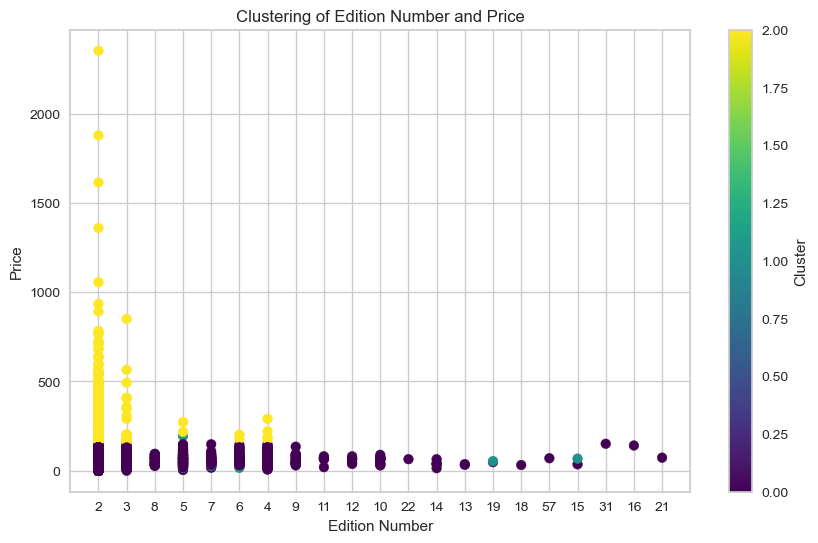

In [159]:
# Now let's plot the clusters to see how they've been assigned based on 'edition_num' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df_5['edition'], df_5['updated_price'], c=df_5['KMeans_cluster_2'], cmap='viridis')
plt.title('Clustering of Edition Number and Price')
plt.xlabel('Edition Number')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()

In [160]:
silhouette_avg = silhouette_score(df_cluster_scaled, clusters)
print(f'Silhouette Score for K-Means with {optimal_clusters} clusters:', silhouette_avg)

Silhouette Score for K-Means with 3 clusters: 0.7382138560948529


In [161]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
clusters = dbscan.fit_predict(df_cluster_scaled)

In [162]:
# Add the cluster labels to the DataFrame
df_5['dbscan_cluster_2'] = clusters

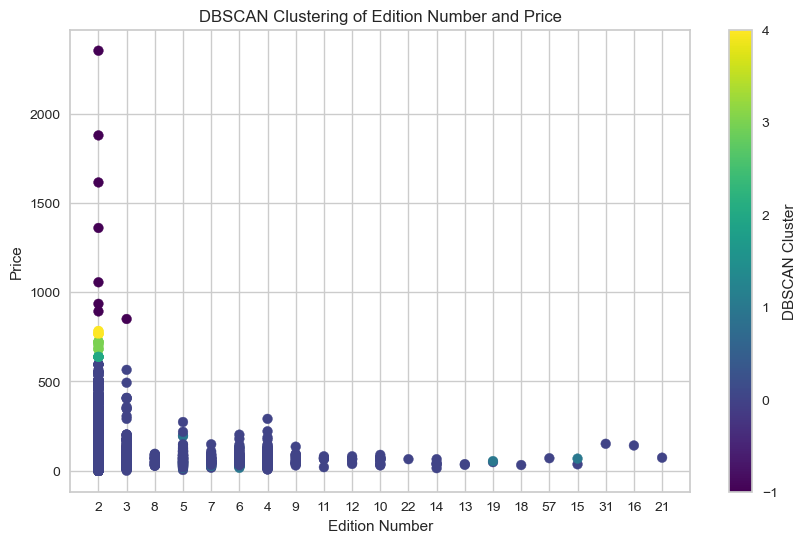

In [163]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_5['edition'], df_5['updated_price'], c=df_5['dbscan_cluster_2'], cmap='viridis')
plt.title('DBSCAN Clustering of Edition Number and Price')
plt.xlabel('Edition Number')
plt.ylabel('Price')
plt.colorbar(label='DBSCAN Cluster')
plt.show()

In [164]:
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
noise_points = list(clusters).count(-1)

In [165]:
print(f"Number of clusters formed: {num_clusters}")
print(f"Number of noise points: {noise_points}")

Number of clusters formed: 5
Number of noise points: 9


###### The two clustering methods illustrate that book prices correlate with edition numbers, with a visible trend of decreasing prices for books with higher edition numbers. 

## TF IDF without TSNE reduction plot

In [166]:
vectorizer = TfidfVectorizer()

In [167]:
vec = vectorizer.fit_transform(df_5['key'])


In [168]:
similarity_check= cosine_similarity(vec, vec)
final_df = pd.DataFrame(similarity_check)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30818,30819,30820,30821,30822,30823,30824,30825,30826,30827
0,1.000000,0.059269,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.070416,0.009359,...,0.0,0.000000,0.000000,0.000000,0.000000,0.032790,0.0,0.000000,0.000000,0.027117
1,0.059269,1.000000,0.000000,0.000000,0.0,0.006244,0.000000,0.000000,0.007573,0.009356,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.027109
2,0.000000,0.000000,1.000000,0.021785,0.0,0.000000,0.000000,0.000000,0.062837,0.043708,...,0.0,0.165169,0.023178,0.005027,0.029516,0.008586,0.0,0.008901,0.004712,0.004255
3,0.000000,0.000000,0.021785,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.039097,...,0.0,0.000000,0.022067,0.000000,0.024207,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.0,0.061378,0.495855,0.019078,0.023203,0.015197,...,0.0,0.000000,0.047510,0.000000,0.026058,0.000000,0.0,0.000000,0.030012,0.000000


In [169]:
#using max iteration to find the best k parameter

In [170]:
# sse=[]
# kmeans_params = {
#     'init': 'random',
#     'n_init': 10,
#     'max_iter': 30,
#     'random_state': 42
# }
# for k in range(1,5):
#     print(f'Cluster {k}/5')

    
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(similarity_check)
#     sse.append(kmeans.inertia_)
#     clear_output(wait=True)
# locator = KneeLocator(range(1,5), sse, curve='convex', direction='decreasing') # needs inference, to get optimal k
# print('Best cluster for KMeans:', locator.elbow)

In [171]:

# kmeans = KMeans(n_clusters=locator.elbow)

kmeans = KMeans(n_clusters=2)
kmeans.fit(similarity_check)
df_5['cluster'] = kmeans.labels_
# df_5.head()

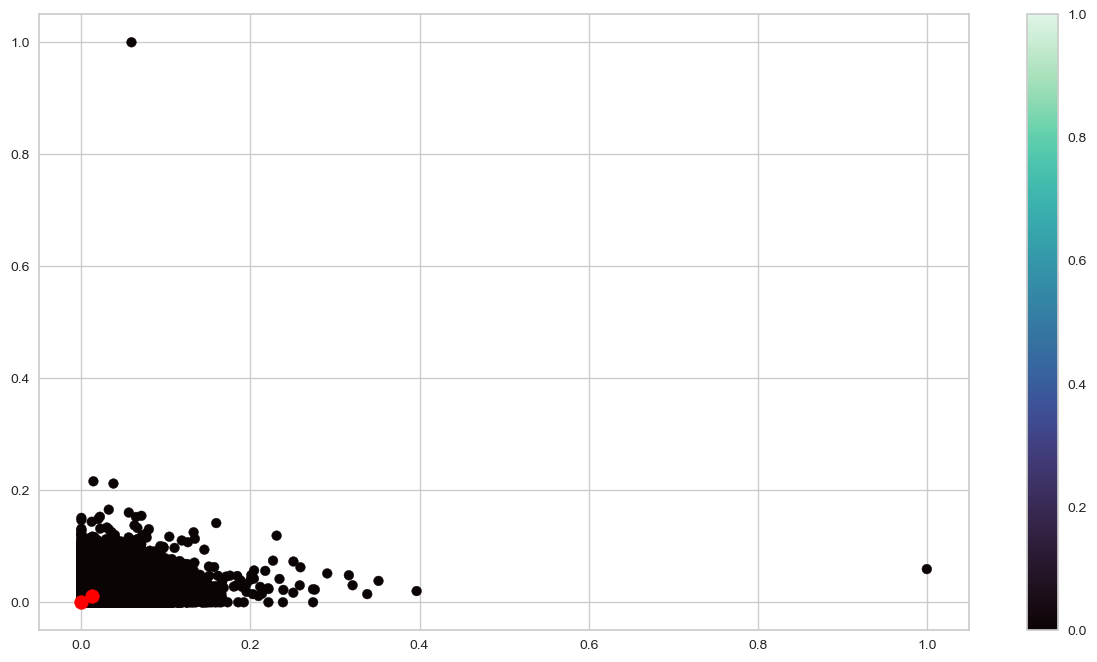

In [172]:
plt.figure(figsize=(15,8))
output = plt.scatter(similarity_check[:,0], similarity_check[:,1], c=df_5.cluster, marker='o', alpha=1, cmap='mako')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker='o')
plt.colorbar(output)
plt.show()

In [173]:
cluster_1 = df_5.loc[df_5['cluster'] == 1, :]
cluster_1.shape

(4232, 22)

In [174]:
cluster_0 = df_5.loc[df_5['cluster'] == 0, :]
cluster_0.shape

(26596, 22)

In [175]:
check = df_5.sample(1, random_state=42)
check

,publisher,pub_year,sale_date,year_of_sale,num_of_author,processed_title,processed_description,updated_price,edition,affordability,...,availability_1,key_words,common_word,length_title_description,key,kmeans_cluster,dbscan_cluster,KMeans_cluster_2,dbscan_cluster_2,cluster
5814,Pearson Education,1753,2010-04-09,2010,2,photoshop elements book for digital photograph...,best selling author scott kelby pairs matt klo...,48.48,2,1,...,1,"[best, selling, author, scott, kelby, pair, ma...","[best, scott, matt, photoshop, element, sellin...",246,best selling author scott kelby pair matt klos...,1,1,1,1,0


## running this will take time ETA:20mins

In [176]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(similarity_check)
df_5['cluster_k_15'] = kmeans.labels_
df_5.head()

,publisher,pub_year,sale_date,year_of_sale,num_of_author,processed_title,processed_description,updated_price,edition,affordability,...,key_words,common_word,length_title_description,key,kmeans_cluster,dbscan_cluster,KMeans_cluster_2,dbscan_cluster_2,cluster,cluster_k_15
0,O'Reilly Media,2024,2024-01-10,2024,1,learning go,go rapidly become preferred language building ...,71.99,2,0,...,"[go, rapidly, become, preferred, language, bui...","[go, language, tutorial, teach, developer, rap...",256,go rapidly become preferred language building ...,0,0,0,0,0,13
1,O'Reilly Media,2023,2023-10-17,2023,1,tidy first,tidying messy software means breaking code mak...,42.99,2,1,...,"[tidying, messy, software, mean, breaking, cod...","[software, code, make, tidying, messy, mean, b...",247,tidying messy software mean breaking code make...,0,0,0,0,0,13
2,O'Reilly Media,2022,2022-10-04,2022,1,hands on machine learning with scikit learn ke...,recent series breakthroughs deep learning boos...,96.99,3,0,...,"[recent, series, breakthrough, deep, learning,...","[learning, recent, series, breakthrough, deep,...",330,recent series breakthrough deep learning boost...,0,0,0,0,0,12
3,O'Reilly Media,2017,2017-03-16,2017,1,designing data intensive applications,data center many challenges system design toda...,67.99,2,0,...,"[data, center, many, challenge, system, design...","[data, center, many, challenge, system, design...",301,data center many challenge system design today...,0,0,0,0,0,11
4,Pearson Education,2023,2023-10-18,2023,1,exam ref ms microsoft administrator,prepare microsoft exam ms help demonstrate rea...,53.86,2,1,...,"[prepare, microsoft, exam, m, help, demonstrat...","[microsoft, prepare, exam, m, help, demonstrat...",220,prepare microsoft exam m help demonstrate real...,0,0,0,0,0,0


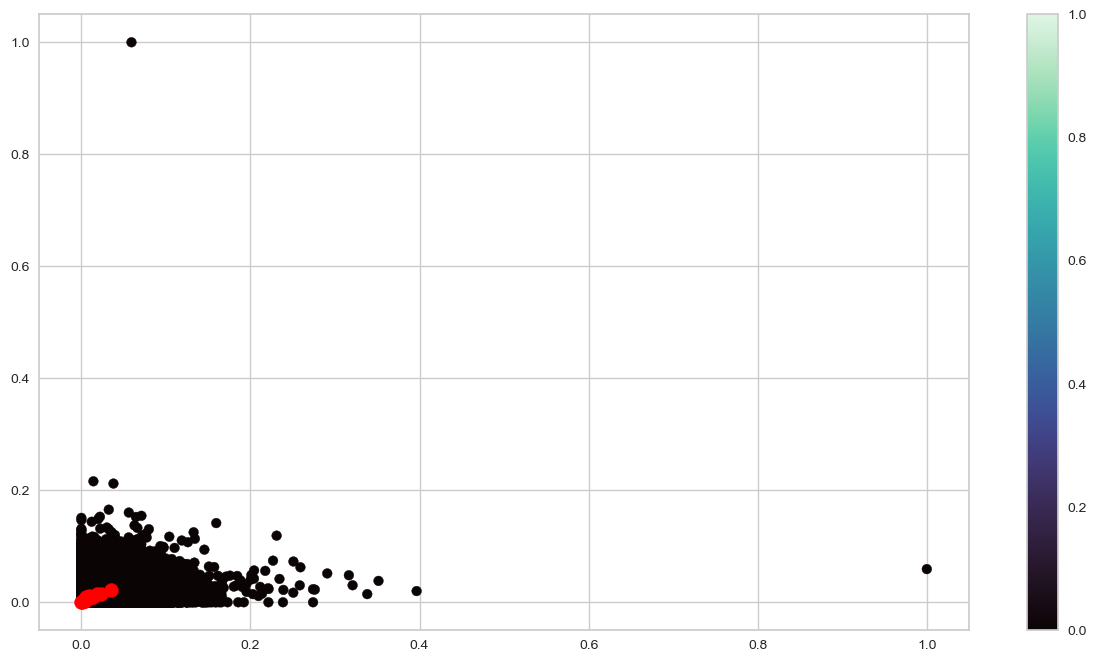

In [177]:
plt.figure(figsize=(15,8))
output = plt.scatter(similarity_check[:,0], similarity_check[:,1], c=df_5.cluster, marker='o', alpha=1, cmap='mako')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1 , marker='o')
plt.colorbar(output)
plt.show()

In [178]:
cluster_1 = df_5.loc[df_5['cluster_k_15'] == 1, :]
cluster_1.shape

(4232, 23)

In [179]:
cluster_12 = df_5.loc[df_5['cluster_k_15'] == 12, :]
cluster_12.shape

(680, 23)

In [180]:
pd.options.display.max_columns = None

In [181]:
pd.set_option('display.max_colwidth', None)

In [182]:
cluster_12.head(5)

,publisher,pub_year,sale_date,year_of_sale,num_of_author,processed_title,processed_description,updated_price,edition,affordability,encoded_price,encoded_year,availability_1,key_words,common_word,length_title_description,key,kmeans_cluster,dbscan_cluster,KMeans_cluster_2,dbscan_cluster_2,cluster,cluster_k_15
2,O'Reilly Media,2022,2022-10-04,2022,1,hands on machine learning with scikit learn keras and tensorflow,recent series breakthroughs deep learning boosted entire field machine learning even programmers know close nothing technology use simple efficient tools implement programs capable learning data bestselling book uses concrete examples minimal theory production ready,96.99,3,0,6,10,1,"[recent, series, breakthrough, deep, learning, boosted, entire, field, machine, learning, even, programmer, know, close, nothing, technology, use, simple, efficient, tool, implement, program, capable, learning, data, bestselling, book, us, concrete, example, minimal, theory, production, ready]","[learning, recent, series, breakthrough, deep, boosted, entire, field, machine, even, programmer, know, close, nothing, technology, use, simple, efficient, tool, implement, program, capable, data, bestselling, book, us, concrete, example, minimal, theory, production, ready]",330,recent series breakthrough deep learning boosted entire field machine learning even programmer know close nothing technology use simple efficient tool implement program capable learning data bestselling book us concrete example minimal theory production ready,0,0,0,0,0,12
14,O'Reilly Media,2022,2023-04-28,2023,1,generative deep learning,generative ai hottest topic tech practical book teaches machine learning engineers data scientists use tensorflow keras create impressive generative deep learning models scratch including variational autoencoders vaes generative adversarial networks gans transformers normalizing flows energy based,84.99,2,0,5,10,1,"[generative, ai, hottest, topic, tech, practical, book, teach, machine, learning, engineer, data, scientist, use, tensorflow, kera, create, impressive, generative, deep, learning, model, scratch, including, variational, autoencoders, vaes, generative, adversarial, network, gans, transformer, normalizing, flow, energy, based]","[generative, learning, ai, hottest, topic, tech, practical, book, teach, machine, engineer, data, scientist, use, tensorflow, kera, create, impressive, deep, model, scratch, including, variational, autoencoders, vaes, adversarial, network, gans, transformer, normalizing, flow, energy, based]",322,generative ai hottest topic tech practical book teach machine learning engineer data scientist use tensorflow kera create impressive generative deep learning model scratch including variational autoencoders vaes generative adversarial network gans transformer normalizing flow energy based,0,0,0,0,0,12
66,Flatiron Books,2021,2021-01-19,2021,1,brief history of artificial intelligence,oxford leading ai researcher comes fun accessible tour history future cutting edge misunderstood field science artificial intelligence somewhat ill defined long term aim ai build machines conscious self aware sentient machines capable kind,16.99,2,1,0,9,1,"[oxford, leading, ai, researcher, come, fun, accessible, tour, history, future, cutting, edge, misunderstood, field, science, artificial, intelligence, somewhat, ill, defined, long, term, aim, ai, build, machine, conscious, self, aware, sentient, machine, capable, kind]","[ai, machine, oxford, leading, researcher, come, fun, accessible, tour, history, future, cutting, edge, misunderstood, field, science, artificial, intelligence, somewhat, ill, defined, long, term, aim, build, conscious, self, aware, sentient, capable, kind]",280,oxford leading ai researcher come fun accessible tour history future cutting edge misunderstood field science artificial intelligence somewhat ill defined long term aim ai build machine conscious self aware sentient machine capable kind,0,0,0,0,0,12
107,O'Reilly 

In [183]:
#not added the t-SNE method here as it will your precisious time !! lol

![](https://cdn.jsdelivr.net/gh/svjai/AML_2203_project@main/images/6.png)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Perform dimensionality reduction using t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# tsne_data = tsne.fit_transform(cosine_sim)

# plt.figure(figsize=(15, 8))
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=new_df.cluster_k_15, marker='o', alpha=0.5, cmap='mako')
# plt.colorbar()
# plt.title('t-SNE Visualization of Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()